In [128]:
import pandas as pd

df_union = pd.read_excel(r"C:\Users\dilor\Downloads\M1\PYTHON\Unione_corretta_finale.xlsx")

df_union

,Scarpa,Categoria,Prezzo,Range_Di_Prezzi,Taglia,Colore,Genere,Brand,Link,Taglie_Singola,Descrizione,Fascia_Prezzo,Materiale_e_Composizione
0,Veja X Études Shark,Sneakers,255,>=120€,35-47,Études Shark,Unisex,Veja,NaN,NaN,NaN,NaN,NaN
1,Fitz Roy Alveomesh Veja X P.Andrade Multico Gr...,Sneakers,250,>=120€,35-47,Multico Grafite,Unisex,Veja,NaN,NaN,NaN,NaN,NaN
2,Double The Style: Molly Boots In Black & Brown,Scarpe,229,>=120€,36 - 42,Brown,Donna,Nae,https://nae-vegan.com/it-it/products/double-th...,"36, 37, 38, 39, 40, 41, 42",NaN,NaN,NaN
3,Iona Black,Scarpe,215,>=120€,36 - 42,Black,Donna,Nae,https://nae-vegan.com/it-it/products/iona-black,"36, 37, 38, 39, 40, 41, 42",NaN,NaN,NaN
4,Goodyear Welt Chelsea Boots,Stivali,212,>=120€,40 - 48,Black - Dark brown suede,Uomo,Wills Vegan Store,https://www.wills-vegan-store.com/products/veg...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,Crepe Sole Desert Boots,Stivali,48,"<79,99€",40 - 48,Black suede - Sand suede,Uomo,Wills Vegan Store,https://www.wills-vegan-store.com/products/veg...,NaN,NaN,NaN,NaN
766,Recycled Espadrille Loafers,Sandali,47,"<79,99€",40 - 48,Denim,Uomo,Wills Vegan Store,https://www.wills-vegan-store.com/products/veg...,NaN,NaN,NaN,NaN
767,Recycled Penny Loafers,Sandali,39,"<79,99€",40 - 48,Beige canvas - Dark blue canvas,Uomo,Wills Vegan Store,https://www.wills-vegan-store.com/products/veg...,NaN,NaN,NaN,NaN
768,Sneaker Eco NW102,Sneakers,34,"<79,99€",35-42,Nero,Donna,AltroTipo,https://www.altrotipo.it/sneaker-eco-nw102/(ht...,"35, 36, 37, 38, 39, 40, 41, 42",NaN,NaN,NaN


In [48]:
df_union.columns

Index(['Scarpa', 'Categoria', 'Prezzo', 'Range_Di_Prezzi', 'Taglia', 'Colore',
       'Genere', 'Brand', 'Link', 'Taglie_Singola', 'Descrizione',
       'Fascia_Prezzo', 'Materiale_e_Composizione'],
      dtype='object')

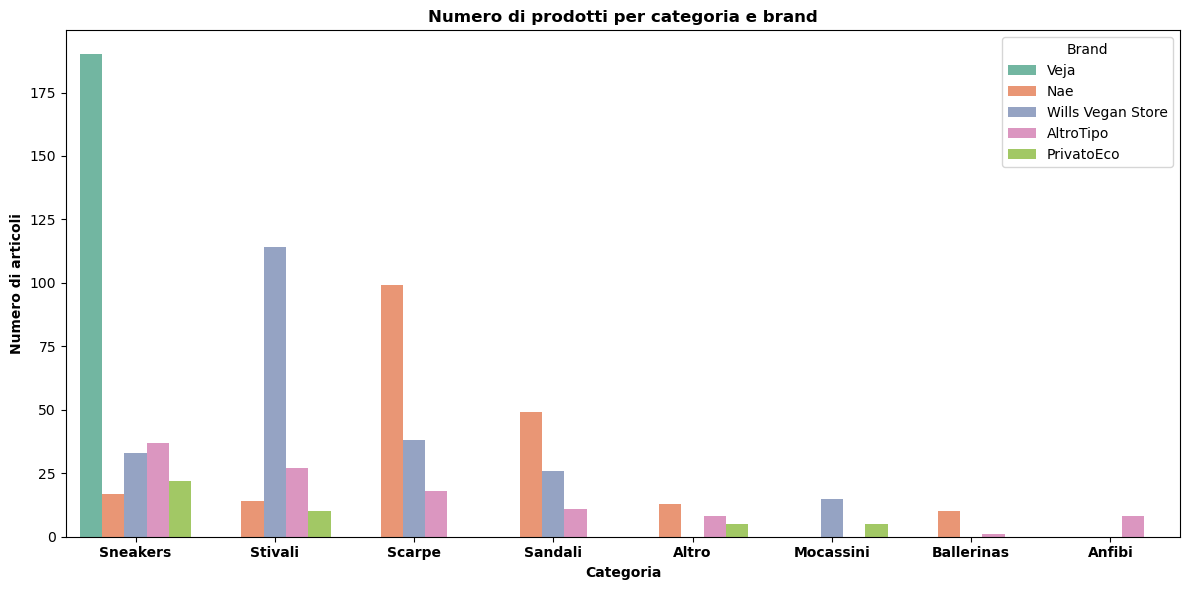

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordina le categorie in base al numero totale di articoli
ordine_categorie = df_union["Categoria"].value_counts().index.tolist()

plt.figure(figsize=(12,6))
sns.countplot(data=df_union, x="Categoria", hue="Brand", palette="Set2", order=ordine_categorie)

plt.title("Numero di prodotti per categoria e brand", fontweight='bold')
plt.xlabel("Categoria", fontweight='bold')
plt.ylabel("Numero di articoli", fontweight='bold')
plt.xticks(rotation=0, ha='center', fontweight='bold')
plt.legend(title="Brand")
plt.tight_layout()
plt.savefig("grafico_prodotti.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\1553308930.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_union, x="Brand", y="Prezzo", palette="Set3")


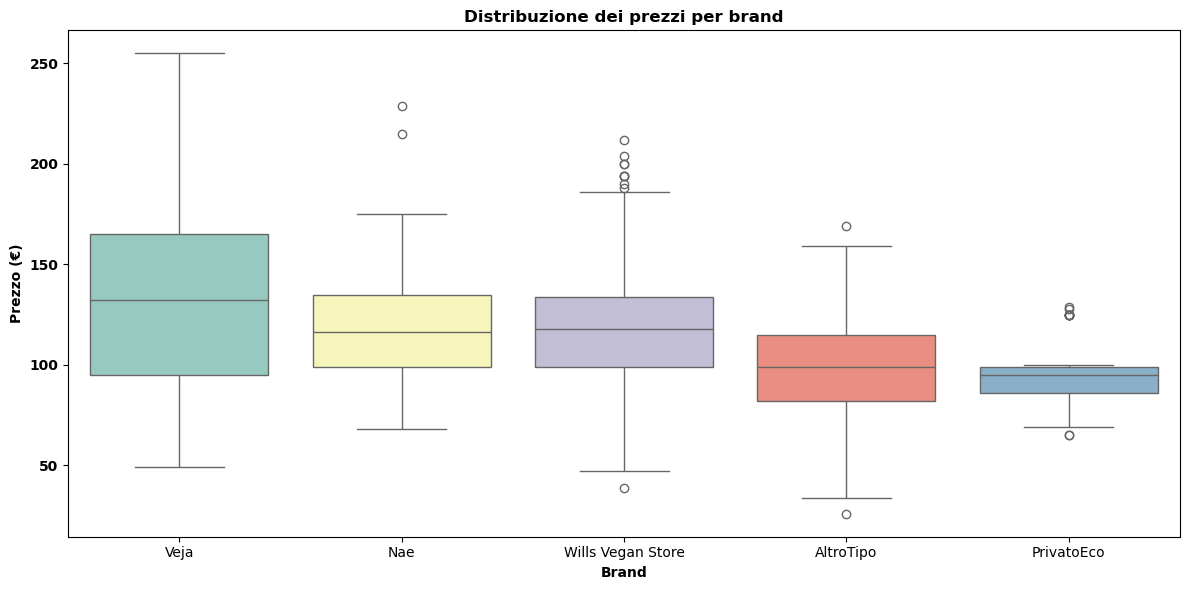

In [78]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_union, x="Brand", y="Prezzo", palette="Set3")

plt.title("Distribuzione dei prezzi per brand", fontweight='bold')
plt.xlabel("Brand", fontweight='bold')
plt.ylabel("Prezzo (€)", fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.savefig("grafico_boxplot_prezzi.png", dpi=300, bbox_inches='tight')
plt.show()


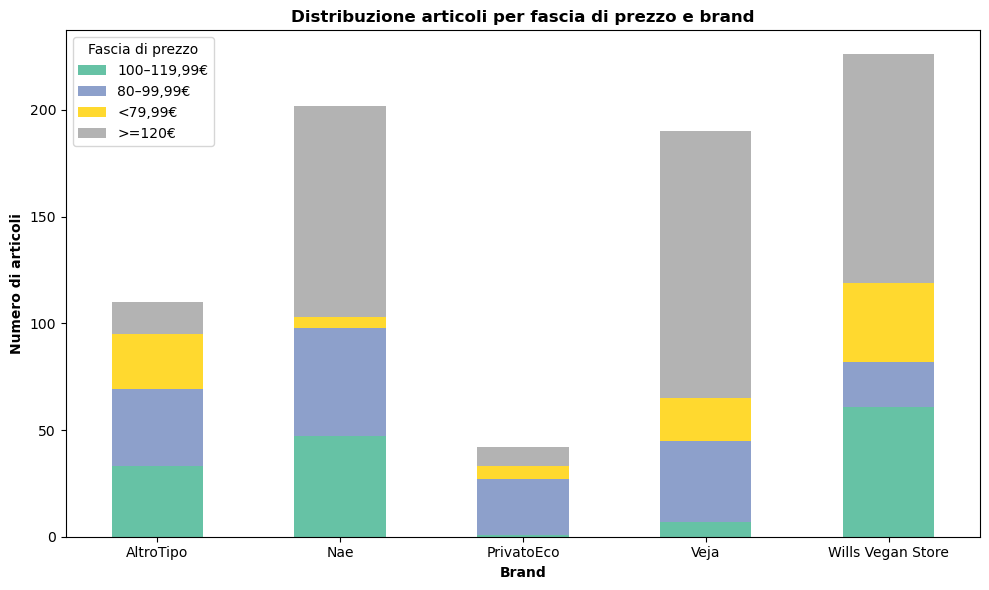

In [80]:
df_fasce = df_union.groupby(["Brand", "Range_Di_Prezzi"]).size().unstack(fill_value=0)

df_fasce.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("Distribuzione articoli per fascia di prezzo e brand", fontweight='bold')
plt.xlabel("Brand", fontweight='bold', rotation = 0)
plt.ylabel("Numero di articoli", fontweight='bold')
plt.xticks(rotation=0, ha='center')
plt.legend(title="Fascia di prezzo")
plt.savefig("grafico_fasce.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


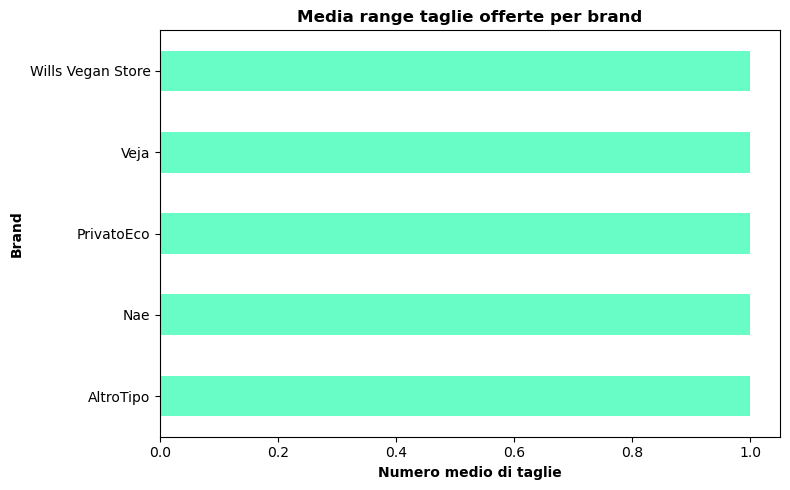

In [84]:
df_union["Num_Taglie"] = df_union["Range_Di_Prezzi"].apply(
    lambda x: len(str(x).split("-")) if "-" in str(x) else 1
)

df_union.groupby("Brand")["Num_Taglie"].mean().sort_values().plot(
    kind="barh", figsize=(8,5), color="#68fdc6"
)

plt.title("Media range taglie offerte per brand", fontweight='bold')
plt.xlabel("Numero medio di taglie", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.tight_layout()
plt.show()


<Axes: xlabel='Categoria', ylabel='count'>

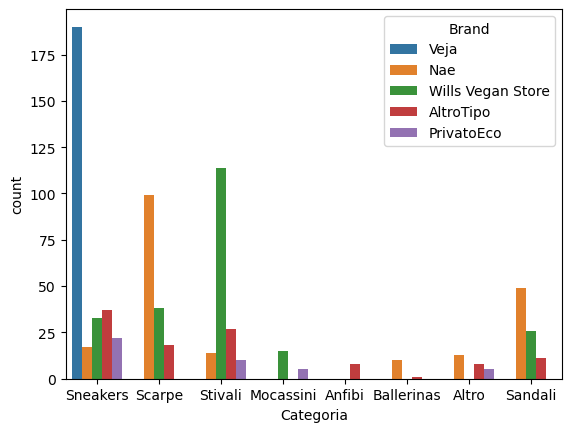

In [86]:
sns.countplot(data=df_union, x="Categoria", hue="Brand")


<Axes: xlabel='Brand'>

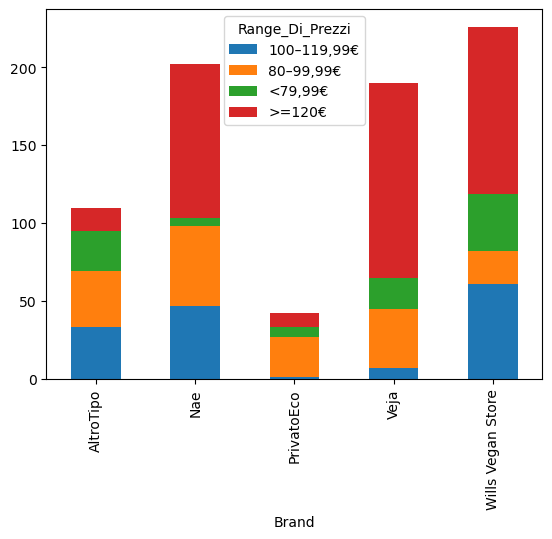

In [90]:
df_union.groupby(["Brand", "Range_Di_Prezzi"]).size().unstack().plot(kind="bar", stacked=True)


<Axes: xlabel='Brand', ylabel='Prezzo'>

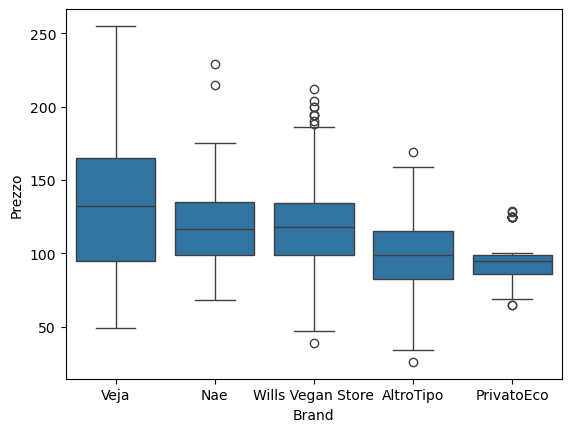

In [92]:
sns.boxplot(data=df_union, x="Brand", y="Prezzo")


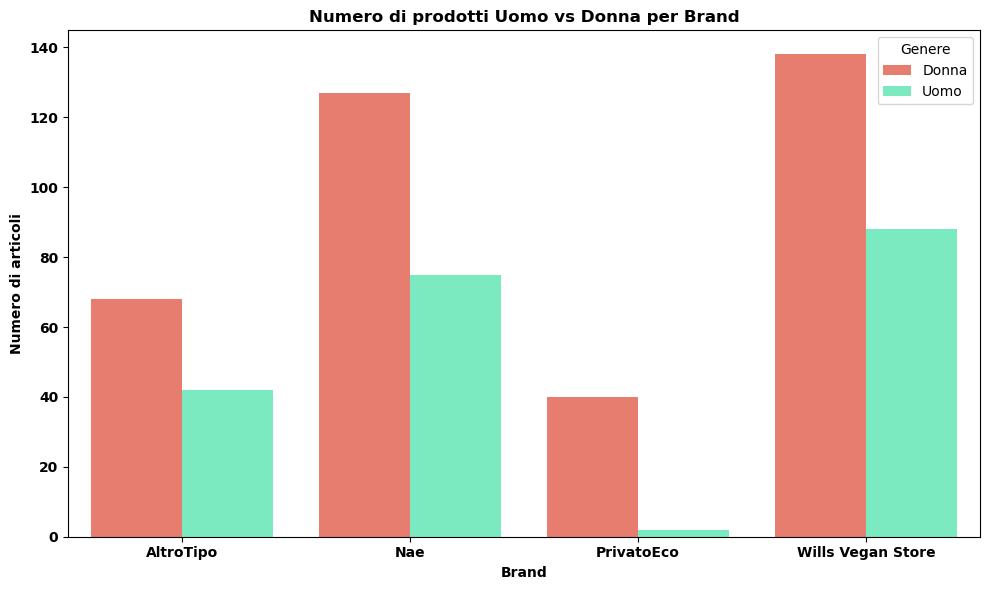

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra solo i prodotti Uomo e Donna
df_filtered = df_union[df_union["Genere"].isin(["Uomo", "Donna"])]

# Raggruppa per Brand e Genere, conta gli articoli
conteggio = df_filtered.groupby(["Brand", "Genere"]).size().reset_index(name="Numero_Articoli")

# Grafico a barre comparativo
plt.figure(figsize=(10, 6))
sns.barplot(
    data=conteggio,
    x="Brand",
    y="Numero_Articoli",
    hue="Genere",
    palette={"Donna": "#fb6e5a", "Uomo": "#68fdc6"}
)

# Stile e layout
plt.title("Numero di prodotti Uomo vs Donna per Brand", fontweight='bold')
plt.xlabel("Brand", fontweight='bold')
plt.ylabel("Numero di articoli", fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(title="Genere")
plt.tight_layout()
plt.savefig("grafico_uomo_vs_donna.png", dpi=300, bbox_inches='tight')
plt.show()


In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola il numero di taglie per ogni prodotto
df_union["Num_Taglie"] = df_union["Taglie_Singola"].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0)

# Calcola la media del numero di taglie per brand
media_taglie = df_union.groupby("Brand")["Num_Taglie"].mean().sort_values()

# Grafico a barre orizzontali
plt.figure(figsize=(10, 6))
sns.barplot(x=media_taglie.values, y=media_taglie.index, palette="Set2")

# Stile
plt.title("Numero medio di taglie offerte per prodotto", fontweight='bold')
plt.xlabel("Numero medio di taglie", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.savefig("grafico_media_taglie_per_brand.png", dpi=300, bbox_inches='tight')
plt.show()


TypeError: object of type 'int' has no len()

In [104]:
def conta_taglie(x):
    if isinstance(x, list):
        return len(x)
    elif isinstance(x, str):
        try:
            lista = eval(x)
            if isinstance(lista, list):
                return len(lista)
        except:
            return 0
    return 0

df_union["Num_Taglie"] = df_union["Taglie_Singola"].apply(conta_taglie)


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\2111039377.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_taglie.values, y=media_taglie.index, palette="Set2")


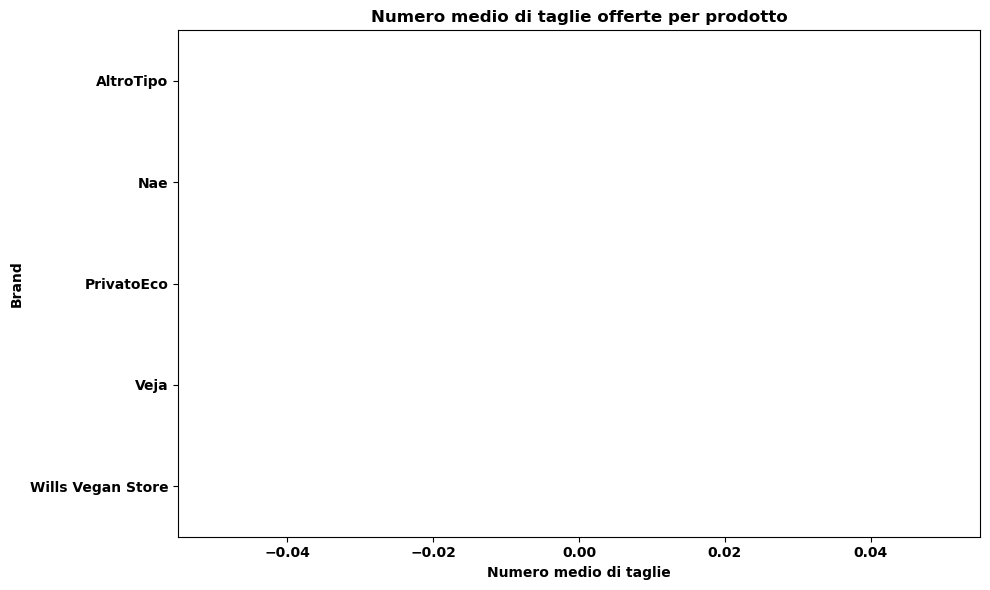

In [106]:
media_taglie = df_union.groupby("Brand")["Num_Taglie"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=media_taglie.values, y=media_taglie.index, palette="Set2")

plt.title("Numero medio di taglie offerte per prodotto", fontweight='bold')
plt.xlabel("Numero medio di taglie", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\2538764033.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_taglie.values, y=media_taglie.index, palette="Set2")


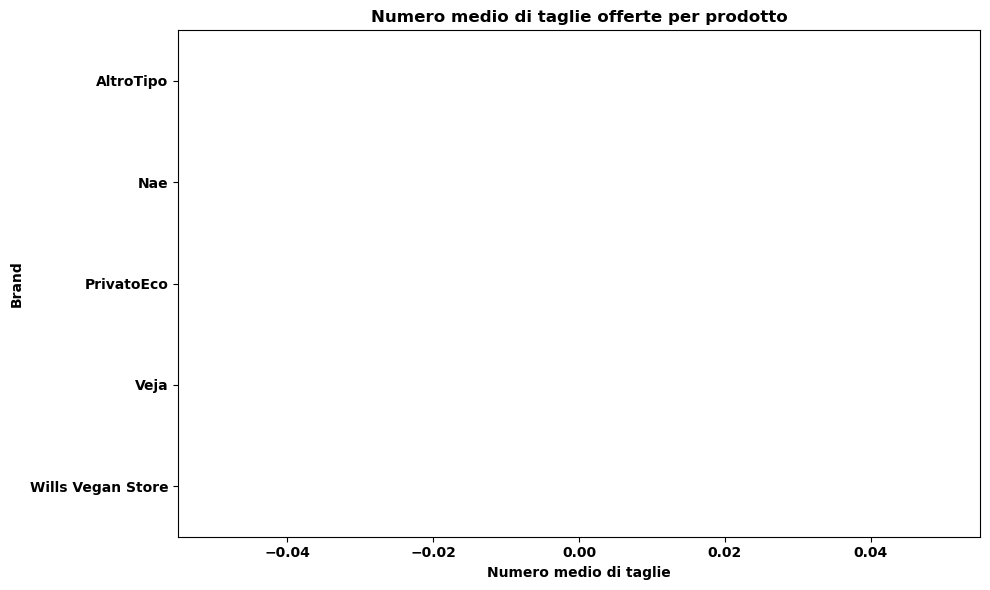

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

media_taglie = df_union.groupby("Brand")["Num_Taglie"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=media_taglie.values, y=media_taglie.index, palette="Set2")

plt.title("Numero medio di taglie offerte per prodotto", fontweight='bold')
plt.xlabel("Numero medio di taglie", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


In [110]:
import ast  # più sicuro di eval

def conta_taglie(x):
    if isinstance(x, list):
        return len(x)
    elif isinstance(x, str):
        try:
            lista = ast.literal_eval(x)
            if isinstance(lista, list):
                return len(lista)
        except:
            return 0
    return 0

# Applichiamo la funzione
df_union["Num_Taglie"] = df_union["Taglie_Singola"].apply(conta_taglie)


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\2538764033.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_taglie.values, y=media_taglie.index, palette="Set2")


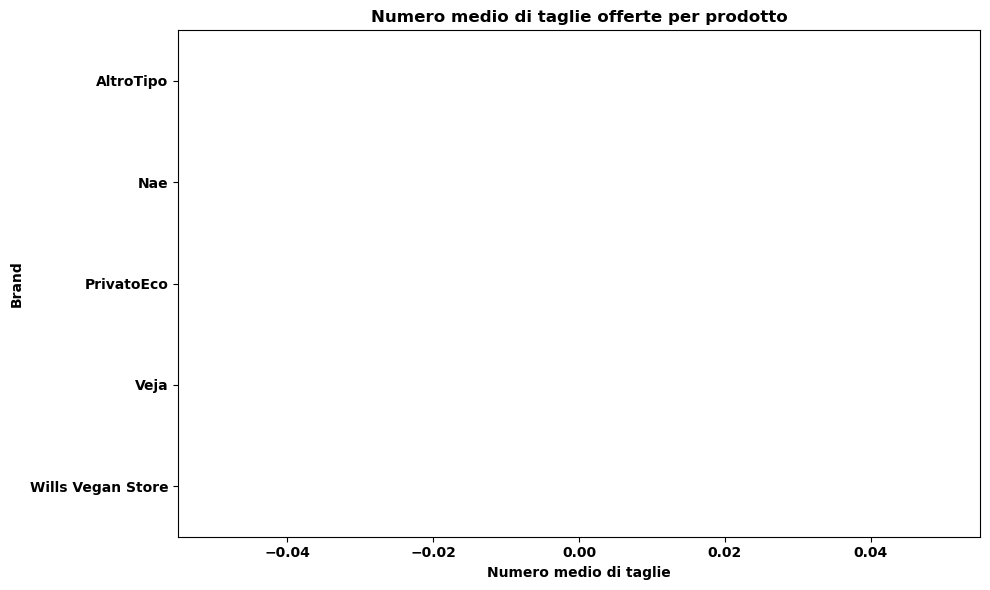

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

media_taglie = df_union.groupby("Brand")["Num_Taglie"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=media_taglie.values, y=media_taglie.index, palette="Set2")

plt.title("Numero medio di taglie offerte per prodotto", fontweight='bold')
plt.xlabel("Numero medio di taglie", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


In [114]:
df_union["Num_Taglie"].value_counts()


Num_Taglie
0    770
Name: count, dtype: int64

In [116]:
df_union["Taglie_Singola"].dropna().unique()[:10]


array(['36, 37, 38, 39, 40, 41, 42', '38, 39, 40, 43',
       '40, 41, 42, 43, 44, 45, 46, 47', '41, 42',
       '37, 38, 39, 40, 42, 43, 46',
       '36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47',
       '36, 38, 42, 43, 45',
       '35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46', '37, 39, 42',
       '44, 45/46'], dtype=object)

In [118]:
def conta_taglie(x):
    if isinstance(x, str):
        taglie = [t.strip() for t in x.split(",") if "/" not in t]
        return len(taglie)
    return 0

df_union["Num_Taglie"] = df_union["Taglie_Singola"].apply(conta_taglie)


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\2816720582.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_taglie.values, y=media_taglie.index, palette="Set2")


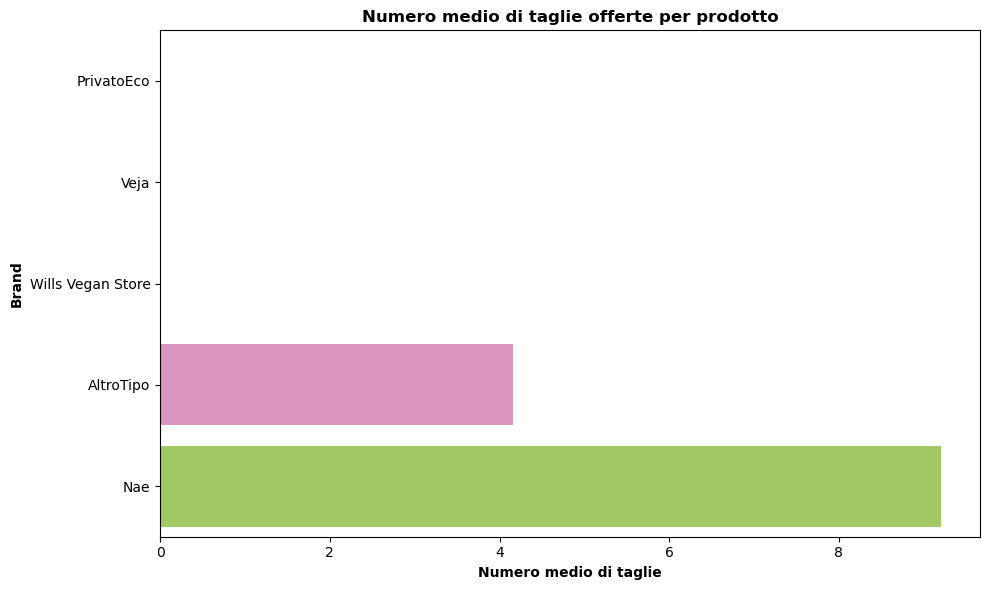

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

media_taglie = df_union.groupby("Brand")["Num_Taglie"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=media_taglie.values, y=media_taglie.index, palette="Set2")

plt.title("Numero medio di taglie offerte per prodotto", fontweight='bold')
plt.xlabel("Numero medio di taglie", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.tight_layout()
plt.show()


In [122]:
df_union[df_union["Brand"] == "Privatoeco"]["Taglie_Singola"].head(10)


Series([], Name: Taglie_Singola, dtype: object)

C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\3007635535.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteggio_taglie_per_brand.values, y=conteggio_taglie_per_brand.index, palette="Set2")


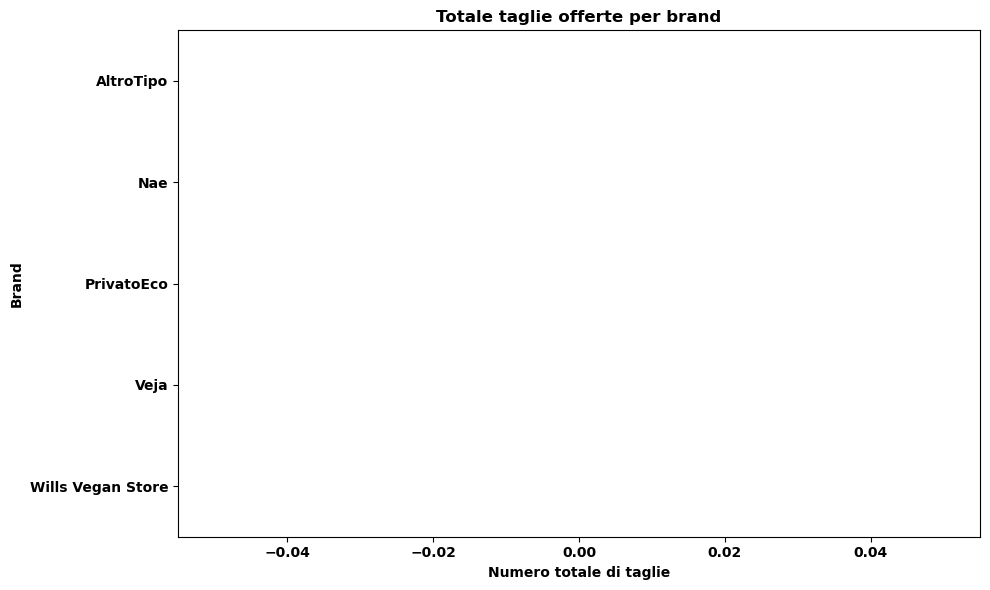

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Funzione che conta le taglie in una stringa
def conta_taglie_stringa(x):
    if isinstance(x, str):
        taglie = [t.strip() for t in x.split(",") if "/" not in t and t.strip().isdigit()]
        return len(taglie)
    return 0

# Applica la funzione
df_union["Num_Taglie"] = df_union["Taglia"].apply(conta_taglie_stringa)

# Raggruppa per Brand e somma
conteggio_taglie_per_brand = df_union.groupby("Brand")["Num_Taglie"].sum().sort_values()

# Grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x=conteggio_taglie_per_brand.values, y=conteggio_taglie_per_brand.index, palette="Set2")

plt.title("Totale taglie offerte per brand", fontweight='bold')
plt.xlabel("Numero totale di taglie", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\381503014.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=taglie_totali_per_brand.values, y=taglie_totali_per_brand.index, palette="Set2")


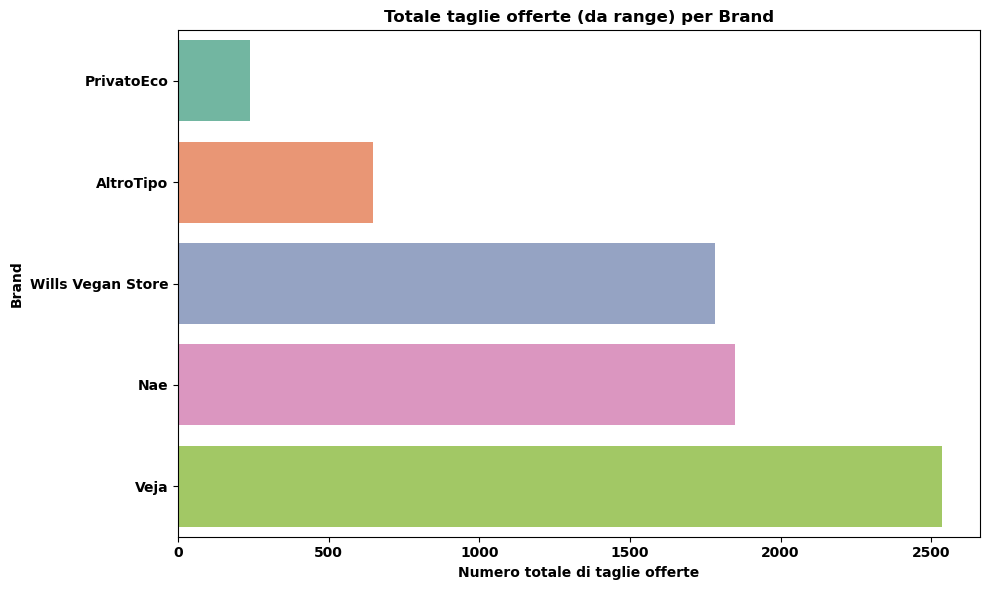

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Funzione per contare le taglie da un range tipo "36-42"
def conta_range_taglie(x):
    if isinstance(x, str) and "-" in x:
        try:
            inizio, fine = map(int, x.split("-"))
            return fine - inizio + 1  # include sia inizio che fine
        except:
            return 0
    return 0

# Applica la funzione a ogni riga
df_union["Num_Taglie"] = df_union["Taglia"].apply(conta_range_taglie)

# Somma il numero di taglie per ogni brand
taglie_totali_per_brand = df_union.groupby("Brand")["Num_Taglie"].sum().sort_values()

# Grafico a barre
plt.figure(figsize=(10, 6))
sns.barplot(x=taglie_totali_per_brand.values, y=taglie_totali_per_brand.index, palette="Set2")

plt.title("Totale taglie offerte (da range) per Brand", fontweight='bold')
plt.xlabel("Numero totale di taglie offerte", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\4084108422.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_per_brand.values, y=media_per_brand.index, palette="Set2")


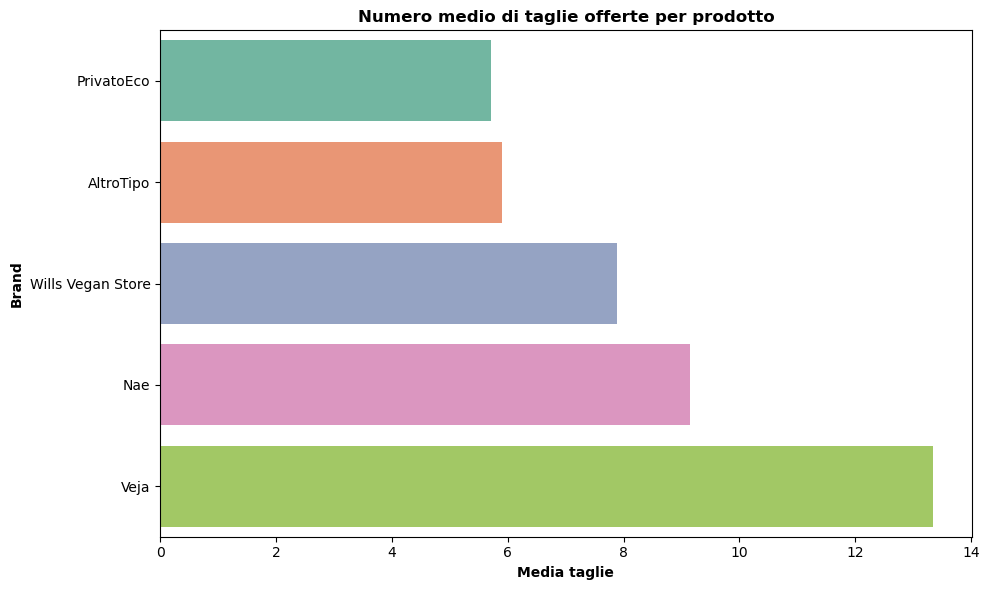

In [136]:
def conta_taglie_range(x):
    if isinstance(x, str) and "-" in x:
        try:
            inizio, fine = map(int, x.split("-"))
            return fine - inizio + 1
        except:
            return 0
    return 0

df_union["Num_Taglie"] = df_union["Taglia"].apply(conta_taglie_range)

media_per_brand = df_union.groupby("Brand")["Num_Taglie"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=media_per_brand.values, y=media_per_brand.index, palette="Set2")

plt.title("Numero medio di taglie offerte per prodotto", fontweight='bold')
plt.xlabel("Media taglie", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.tight_layout()
plt.savefig("grafico_media_taglie_offerte_per_brand.png", dpi=300, bbox_inches='tight')
plt.show()


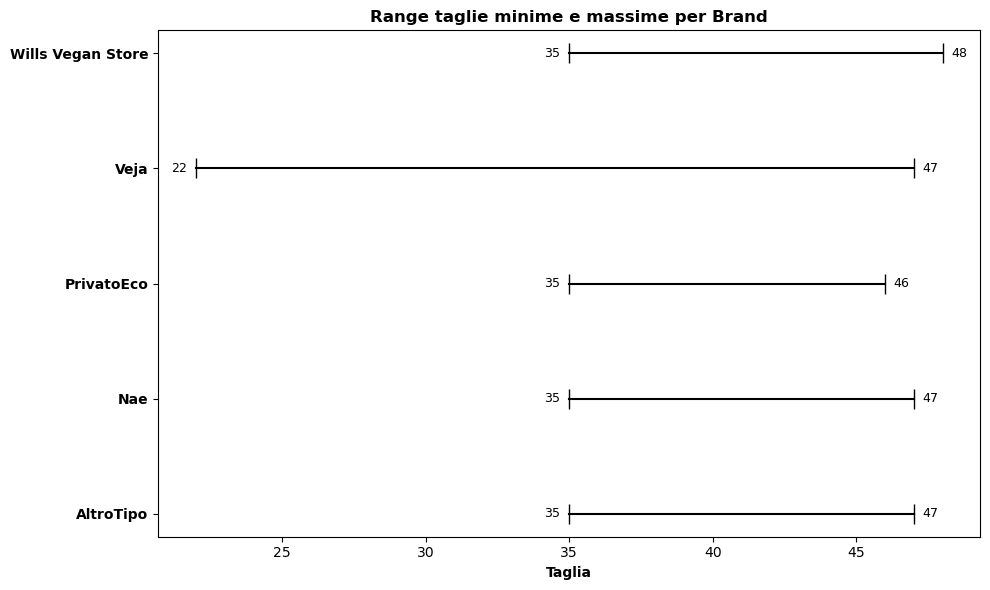

In [138]:
def estrai_estremi(x):
    if isinstance(x, str) and "-" in x:
        try:
            inizio, fine = map(int, x.split("-"))
            return pd.Series([inizio, fine])
        except:
            return pd.Series([None, None])
    return pd.Series([None, None])

df_union[["Taglia_Min", "Taglia_Max"]] = df_union["Taglia"].apply(estrai_estremi)

taglia_min_max = df_union.groupby("Brand")[["Taglia_Min", "Taglia_Max"]].agg(["min", "max"])

# Flatten MultiIndex
taglia_min_max.columns = ['Min_Min', 'Min_Max', 'Max_Min', 'Max_Max']
taglia_min_max = taglia_min_max.reset_index()

# Linee di copertura
plt.figure(figsize=(10, 6))
for i, row in taglia_min_max.iterrows():
    plt.plot([row["Min_Min"], row["Max_Max"]], [i, i], marker="|", markersize=15, color="black")
    plt.text(row["Min_Min"] - 0.3, i, str(row["Min_Min"]), va='center', ha='right', fontsize=9)
    plt.text(row["Max_Max"] + 0.3, i, str(row["Max_Max"]), va='center', ha='left', fontsize=9)

plt.yticks(range(len(taglia_min_max)), taglia_min_max["Brand"], fontweight='bold')
plt.title("Range taglie minime e massime per Brand", fontweight='bold')
plt.xlabel("Taglia", fontweight='bold')
plt.tight_layout()
plt.show()


In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Funzione che estrae taglie singole da stringhe
def estrai_taglie(x):
    if isinstance(x, str):
        return [t.strip() for t in x.split(",") if t.strip().isdigit()]
    elif isinstance(x, list):
        return [str(t).strip() for t in x if str(t).strip().isdigit()]
    return []

# Applica funzione
df_union["Taglie_Esplose"] = df_union["Taglie_Singola"].apply(estrai_taglie)


In [142]:
# Ogni taglia in una riga separata
df_taglie = df_union.explode("Taglie_Esplose")

# Rinomina la colonna per chiarezza
df_taglie = df_taglie.rename(columns={"Taglie_Esplose": "Taglia_Singola"})


ValueError: cannot reindex on an axis with duplicate labels

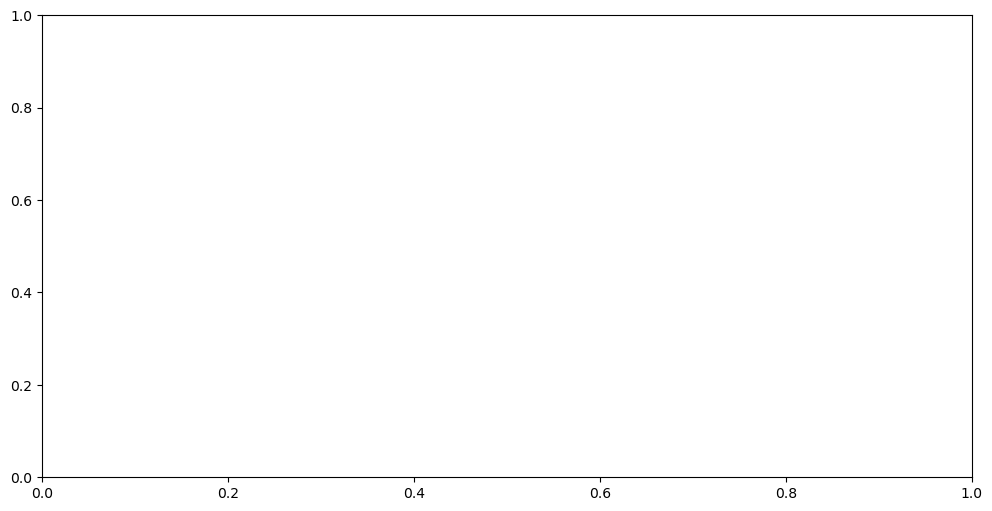

In [144]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_taglie, x="Taglia_Singola", hue="Brand", palette="Set2")

plt.title("Distribuzione delle taglie singole per Brand", fontweight='bold')
plt.xlabel("Taglia", fontweight='bold')
plt.ylabel("Numero di articoli", fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(title="Brand")
plt.tight_layout()
plt.show()


In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Funzione per pulire taglie
def estrai_taglie(x):
    if isinstance(x, str):
        return [t.strip() for t in x.split(",") if t.strip().isdigit()]
    elif isinstance(x, list):
        return [str(t).strip() for t in x if str(t).strip().isdigit()]
    return []

# Applichiamo la funzione
df_union = df_union.copy()
df_union["Taglie_Esplose"] = df_union["Taglie_Singola"].apply(estrai_taglie)

# Eliminiamo righe vuote e resettiamo l'indice
df_union_clean = df_union[df_union["Taglie_Esplose"].apply(len) > 0].reset_index(drop=True)

# Esplodiamo su una colonna pulita
df_taglie = df_union_clean.explode("Taglie_Esplose")
df_taglie = df_taglie.rename(columns={"Taglie_Esplose": "Taglia_Singola"})


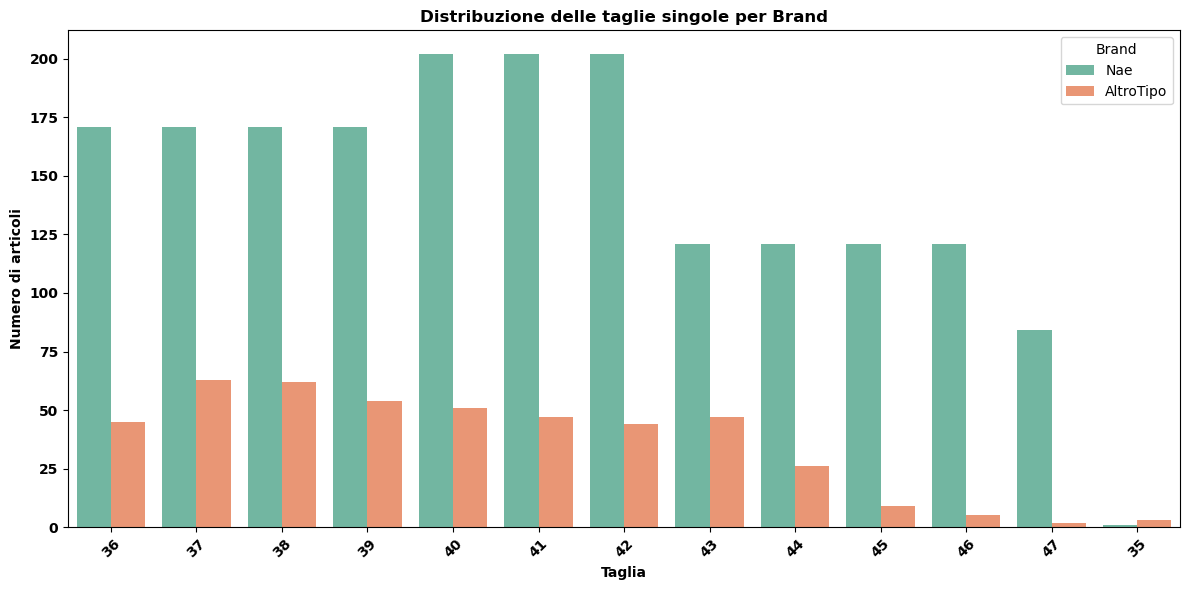

In [148]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_taglie, x="Taglia_Singola", hue="Brand", palette="Set2")

plt.title("Distribuzione delle taglie singole per Brand", fontweight='bold')
plt.xlabel("Taglia", fontweight='bold')
plt.ylabel("Numero di articoli", fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(title="Brand")
plt.tight_layout()
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\1284085439.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_per_brand.values, y=media_per_brand.index, palette="Set2")


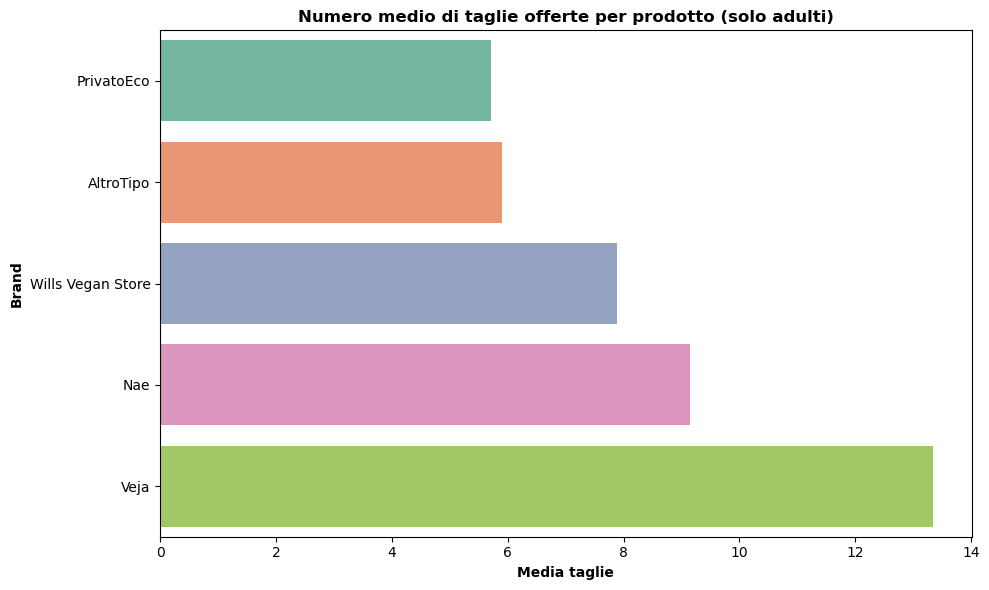

In [152]:
def conta_taglie_range(x):
    if isinstance(x, str) and "-" in x:
        try:
            inizio, fine = map(int, x.split("-"))
            return fine - inizio + 1
        except:
            return 0
    return 0

# Calcolo del numero di taglie
df_union["Num_Taglie"] = df_union["Taglia"].apply(conta_taglie_range)

# Estrai taglia iniziale per il filtro di Veja
def taglia_minima(x):
    if isinstance(x, str) and "-" in x:
        try:
            inizio = int(x.split("-")[0])
            return inizio
        except:
            return None
    return None

df_union["Taglia_Min"] = df_union["Taglia"].apply(taglia_minima)

# Filtro: per Veja prendi solo taglie minime ≥ 35
df_filtrato = df_union[~((df_union["Brand"] == "Veja") & (df_union["Taglia_Min"] > 35))]

# Calcolo media per brand
media_per_brand = df_filtrato.groupby("Brand")["Num_Taglie"].mean().sort_values()

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=media_per_brand.values, y=media_per_brand.index, palette="Set2")

plt.title("Numero medio di taglie offerte per prodotto (solo adulti)", fontweight='bold')
plt.xlabel("Media taglie", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.tight_layout()
plt.savefig("grafico_media_taglie_adulto_per_brand.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\3915671348.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_per_brand.values, y=media_per_brand.index, palette="Set2")


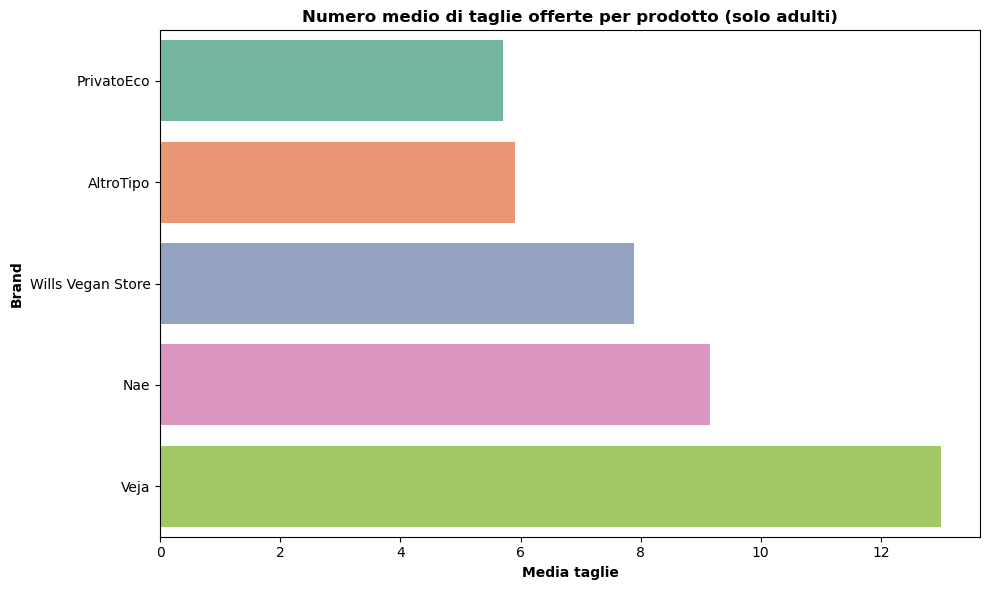

In [154]:
def conta_taglie_range(x):
    if isinstance(x, str) and "-" in x:
        try:
            inizio, fine = map(int, x.split("-"))
            return fine - inizio + 1
        except:
            return 0
    return 0

# Calcolo del numero di taglie
df_union["Num_Taglie"] = df_union["Taglia"].apply(conta_taglie_range)

# Estrai taglia iniziale per il filtro di Veja
def taglia_minima(x):
    if isinstance(x, str) and "-" in x:
        try:
            inizio = int(x.split("-")[0])
            return inizio
        except:
            return None
    return None

df_union["Taglia_Min"] = df_union["Taglia"].apply(taglia_minima)

# Filtro: per Veja prendi solo taglie minime ≥ 35
df_filtrato = df_union[~((df_union["Brand"] == "Veja") & (df_union["Taglia_Min"] < 35))]

# Calcolo media per brand
media_per_brand = df_filtrato.groupby("Brand")["Num_Taglie"].mean().sort_values()

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=media_per_brand.values, y=media_per_brand.index, palette="Set2")

plt.title("Numero medio di taglie offerte per prodotto (solo adulti)", fontweight='bold')
plt.xlabel("Media taglie", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.tight_layout()
plt.savefig("grafico_media_taglie_adulto_per_brand.png", dpi=300, bbox_inches='tight')
plt.show()


In [156]:
def estrai_taglia_min(x):
    if isinstance(x, str) and "-" in x:
        try:
            inizio = int(x.split("-")[0].strip())
            return inizio
        except:
            return None
    return None

df_union["Taglia_Min"] = df_union["Taglia"].apply(estrai_taglia_min)


In [158]:
# Filtro: per Veja escludi le righe con Taglia_Min < 36
df_filtrato = df_union.copy()
df_filtrato = df_filtrato[~((df_filtrato["Brand"] == "Veja") & (df_filtrato["Taglia_Min"] < 36))]


In [160]:
def conta_taglie_range(x):
    if isinstance(x, str) and "-" in x:
        try:
            inizio, fine = map(int, x.split("-"))
            return fine - inizio + 1
        except:
            return 0
    return 0

df_filtrato["Num_Taglie"] = df_filtrato["Taglia"].apply(conta_taglie_range)


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\3444479315.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_per_brand.values, y=media_per_brand.index, palette="Set2")


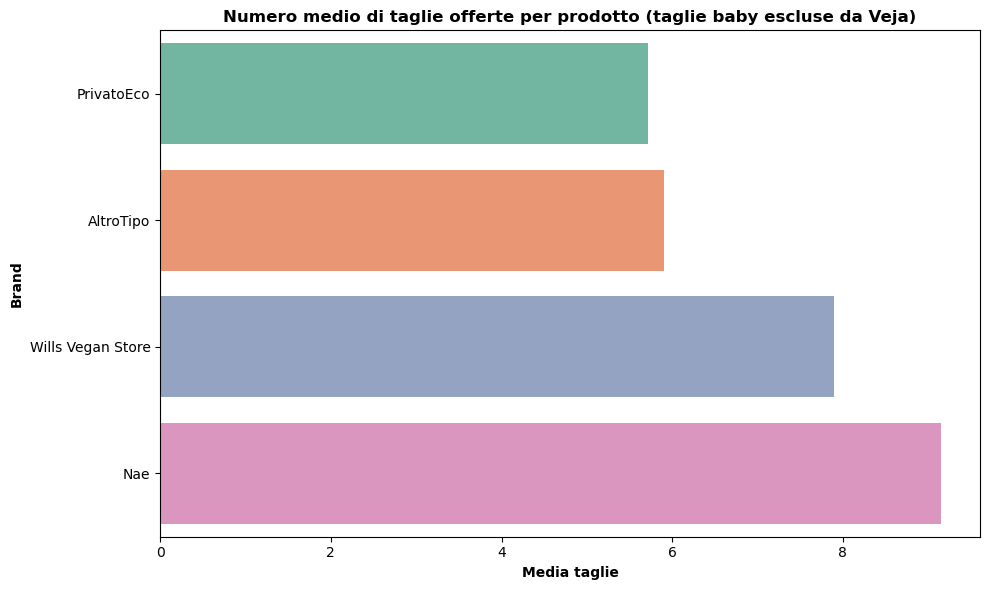

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

media_per_brand = df_filtrato.groupby("Brand")["Num_Taglie"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=media_per_brand.values, y=media_per_brand.index, palette="Set2")

plt.title("Numero medio di taglie offerte per prodotto (taglie baby escluse da Veja)", fontweight='bold')
plt.xlabel("Media taglie", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.tight_layout()
plt.savefig("grafico_taglie_filtrate_veja.png", dpi=300, bbox_inches='tight')
plt.show()


In [164]:
def estremi_taglia(x):
    if isinstance(x, str) and "-" in x:
        try:
            inizio, fine = map(int, x.split("-"))
            return pd.Series([inizio, fine])
        except:
            return pd.Series([None, None])
    return pd.Series([None, None])

df_union[["Taglia_Min", "Taglia_Max"]] = df_union["Taglia"].apply(estremi_taglia)


In [166]:
df_filtrato = df_union[~((df_union["Brand"] == "Veja") & (df_union["Taglia_Max"] < 36))]


In [168]:
def conta_taglie_range(x):
    if isinstance(x, str) and "-" in x:
        try:
            inizio, fine = map(int, x.split("-"))
            return fine - inizio + 1
        except:
            return 0
    return 0

df_filtrato["Num_Taglie"] = df_filtrato["Taglia"].apply(conta_taglie_range)


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\3755516648.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrato["Num_Taglie"] = df_filtrato["Taglia"].apply(conta_taglie_range)


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\2728124882.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_per_brand.values, y=media_per_brand.index, palette="Set2")


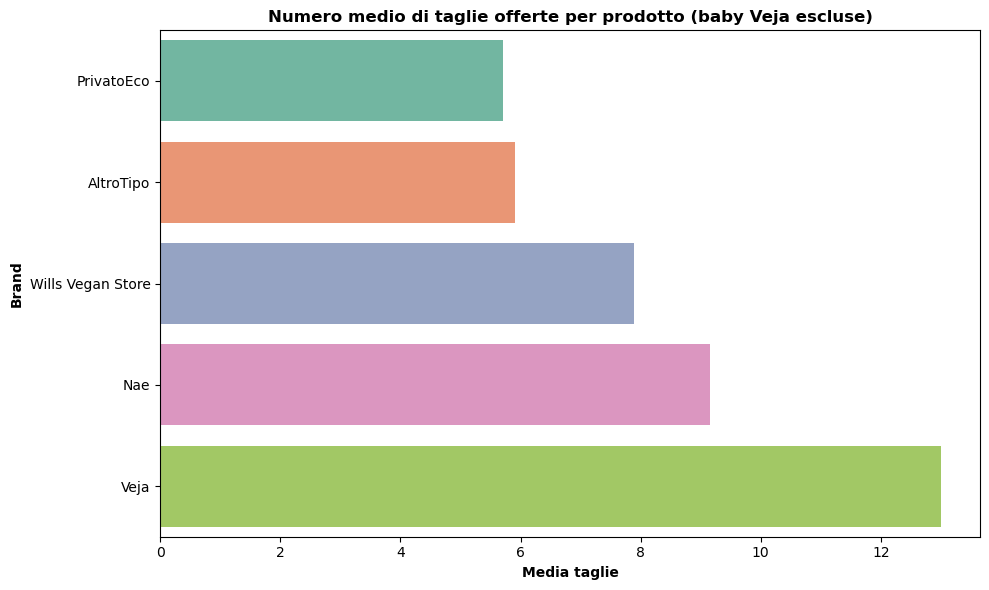

In [170]:
media_per_brand = df_filtrato.groupby("Brand")["Num_Taglie"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=media_per_brand.values, y=media_per_brand.index, palette="Set2")

plt.title("Numero medio di taglie offerte per prodotto (baby Veja escluse)", fontweight='bold')
plt.xlabel("Media taglie", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.tight_layout()
plt.show()


In [172]:
def conta_taglie_adulte(x):
    if isinstance(x, str) and "-" in x:
        try:
            inizio, fine = map(int, x.split("-"))
            # Limita il range alle taglie adulte (36–47)
            inizio_effettivo = max(inizio, 36)
            fine_effettivo = min(fine, 47)
            if inizio_effettivo > fine_effettivo:
                return 0
            return fine_effettivo - inizio_effettivo + 1
        except:
            return 0
    return 0

# Applica la funzione a tutti
df_union["Num_Taglie_Adulte"] = df_union["Taglia"].apply(conta_taglie_adulte)

# Ora calcola la media solo su queste
media_taglie_adulte = df_union.groupby("Brand")["Num_Taglie_Adulte"].mean().sort_values()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\1506708770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_taglie_adulte.values, y=media_taglie_adulte.index, palette="Set2")


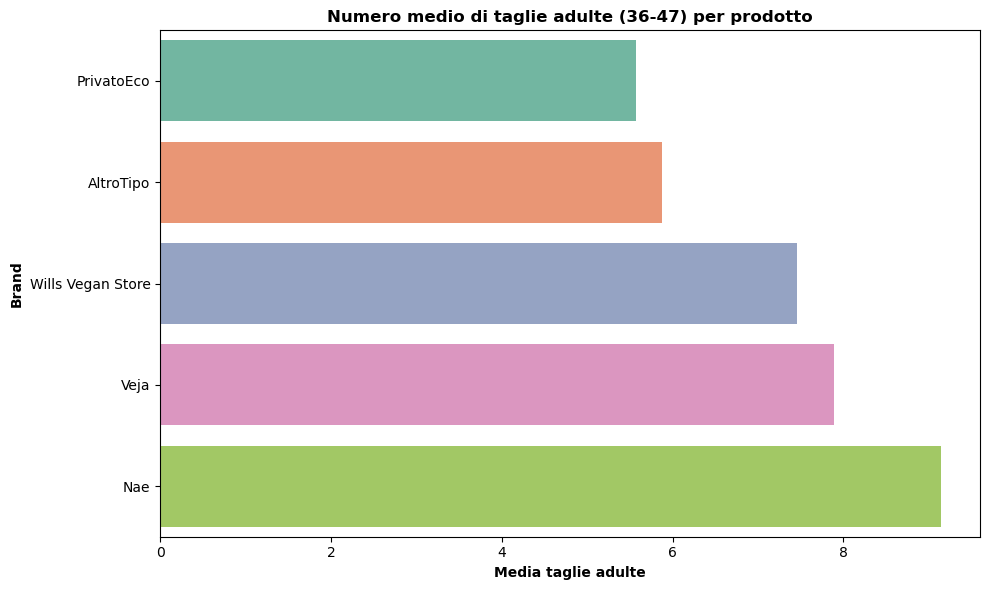

In [176]:
plt.figure(figsize=(10, 6))
sns.barplot(x=media_taglie_adulte.values, y=media_taglie_adulte.index, palette="Set2")

plt.title("Numero medio di taglie adulte (36-47) per prodotto", fontweight='bold')
plt.xlabel("Media taglie adulte", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.tight_layout()
plt.savefig("grafico_taglie_filtrate_veja.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\2397221020.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_union, x="Brand", y="Prezzo", palette="Set2")


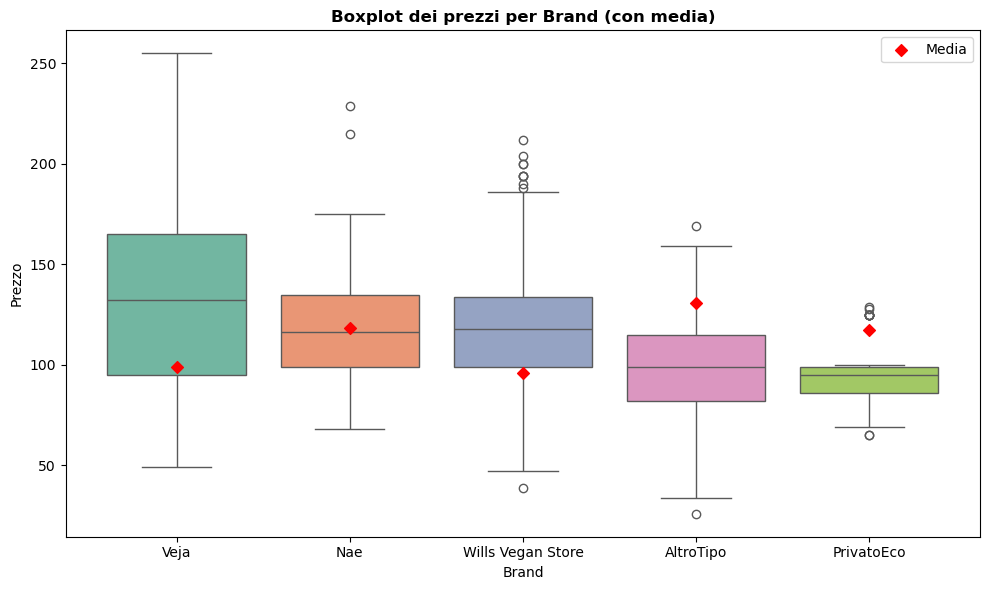

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_union, x="Brand", y="Prezzo", palette="Set2")

# Calcolo della media per ogni brand e sovrapposizione con un punto
media = df_union.groupby("Brand")["Prezzo"].mean()
for i, brand in enumerate(media.index):
    plt.scatter(i, media[brand], color='red', marker='D', label='Media' if i == 0 else "", zorder=5)

plt.legend()
plt.title("Boxplot dei prezzi per Brand (con media)", fontweight='bold')
plt.tight_layout()
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\1061212811.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prezzo_medio.values, y=prezzo_medio.index, palette="Set2")


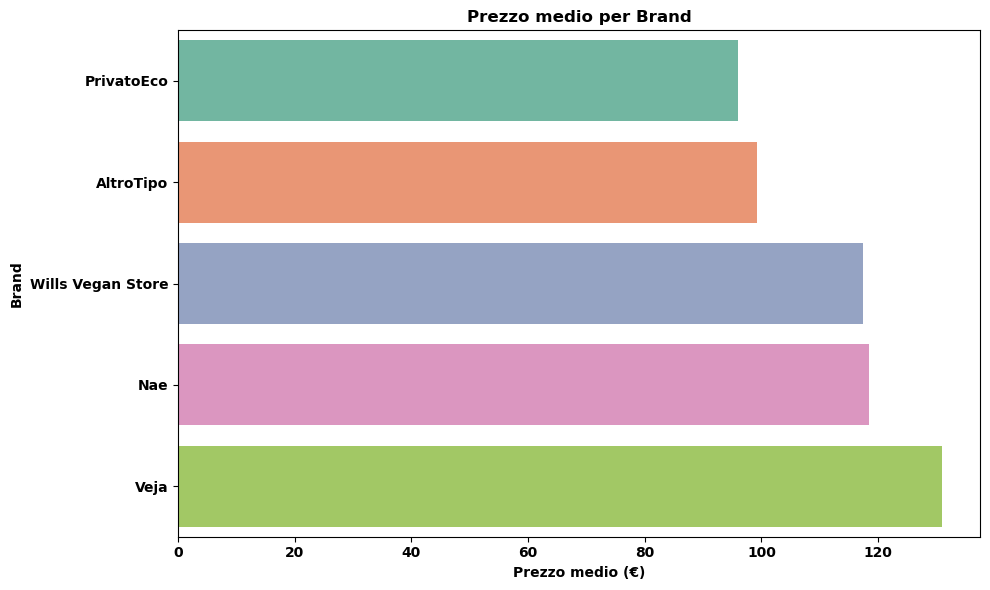

In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcola la media dei prezzi per brand
prezzo_medio = df_union.groupby("Brand")["Prezzo"].mean().sort_values()

# Crea il grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=prezzo_medio.values, y=prezzo_medio.index, palette="Set2")

# Stile
plt.title("Prezzo medio per Brand", fontweight='bold')
plt.xlabel("Prezzo medio (€)", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\1996305613.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prezzo_medio.index, y=prezzo_medio.values, palette=colori[:len(prezzo_medio)])


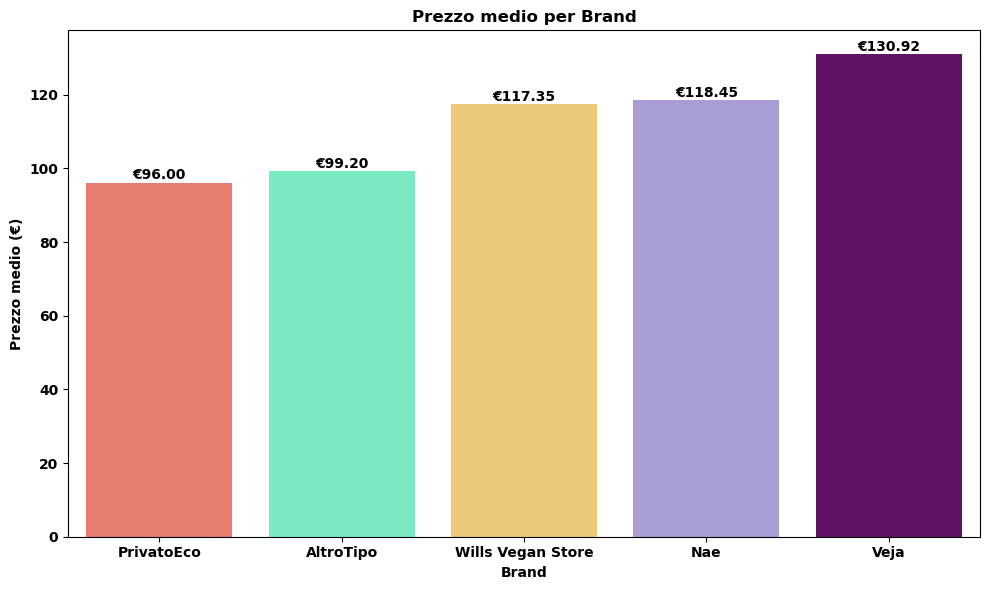

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolo del prezzo medio per brand
prezzo_medio = df_union.groupby("Brand")["Prezzo"].mean().sort_values()

# Colori personalizzati (puoi modificarli o aggiungerne)
colori = ["#fb6e5a", "#68fdc6", "#FFD166", "#A593E0", "#6A0572"]

# Grafico a colonne verticali
plt.figure(figsize=(10, 6))
sns.barplot(x=prezzo_medio.index, y=prezzo_medio.values, palette=colori[:len(prezzo_medio)])

# Aggiunta etichette sopra le colonne
for i, valore in enumerate(prezzo_medio.values):
    plt.text(i, valore + 1, f"€{valore:.2f}", ha='center', fontweight='bold')

# Stile e layout
plt.title("Prezzo medio per Brand", fontweight='bold')
plt.xlabel("Brand", fontweight='bold')
plt.ylabel("Prezzo medio (€)", fontweight='bold')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.savefig("prezzo_medio.png", dpi=300, bbox_inches='tight')
plt.show()


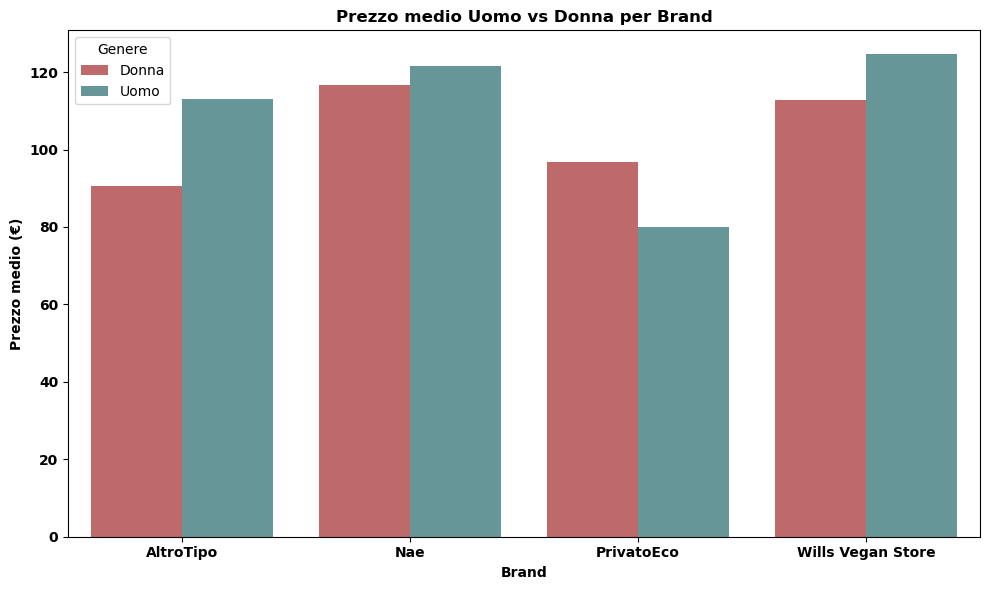

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolo della media prezzi per Brand e Genere
media_uomo_donna = (
    df_union[df_union["Genere"].isin(["Uomo", "Donna"])]
    .groupby(["Brand", "Genere"])["Prezzo"]
    .mean()
    .reset_index()
)

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(data=media_uomo_donna, x="Brand", y="Prezzo", hue="Genere",
            palette={"Donna": "#cd5c5c", "Uomo": "#5f9ea0"})

plt.title("Prezzo medio Uomo vs Donna per Brand", fontweight='bold')
plt.xlabel("Brand", fontweight='bold')
plt.ylabel("Prezzo medio (€)", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(title="Genere")
plt.tight_layout()
plt.savefig("prezzo_medio_per_genere.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\982543476.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_union[df_union["Genere"].isin(["Uomo", "Donna"])],


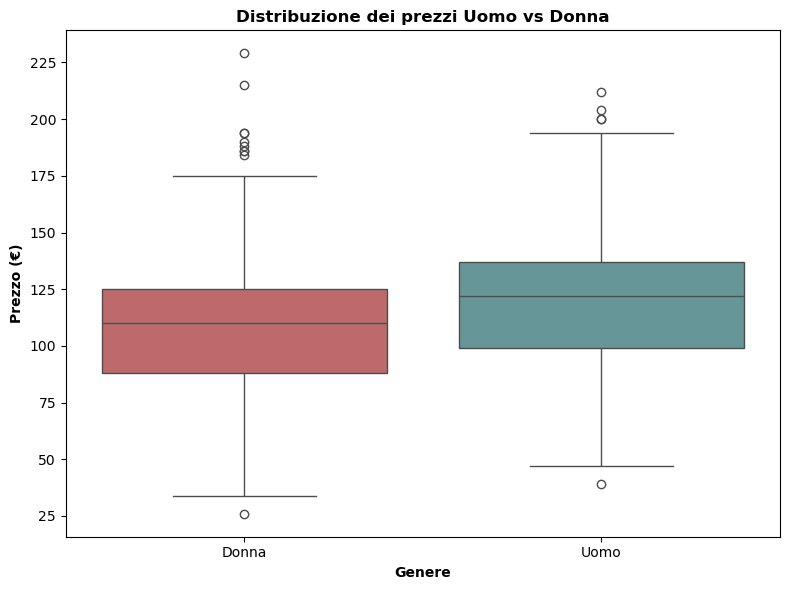

In [198]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_union[df_union["Genere"].isin(["Uomo", "Donna"])],
            x="Genere", y="Prezzo", palette={"Donna": "#cd5c5c", "Uomo": "#5f9ea0"})

plt.title("Distribuzione dei prezzi Uomo vs Donna", fontweight='bold')
plt.xlabel("Genere", fontweight='bold')
plt.ylabel("Prezzo (€)", fontweight='bold')
plt.tight_layout()
plt.savefig("boxplot_genere.png", dpi=300, bbox_inches='tight')
plt.show()


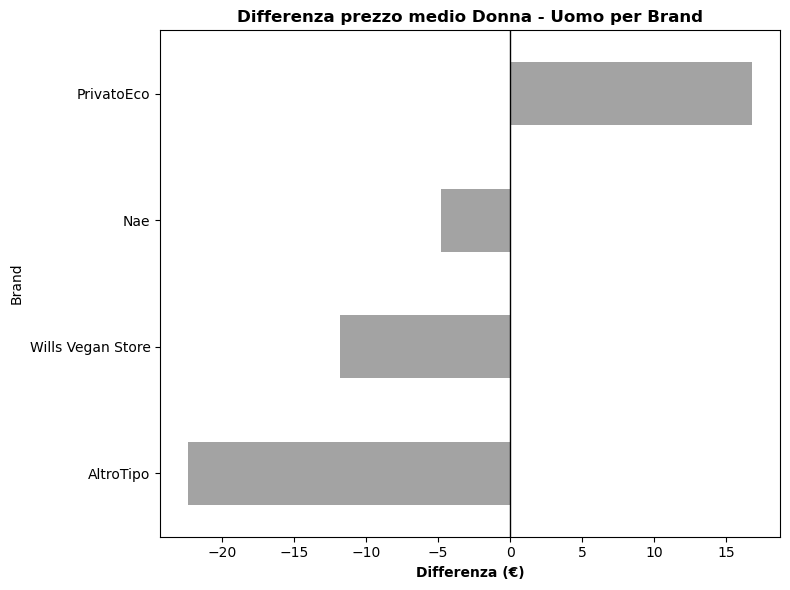

In [200]:
# Pivot per calcolare la differenza
pivot_diff = media_uomo_donna.pivot(index="Brand", columns="Genere", values="Prezzo")
pivot_diff["Differenza"] = pivot_diff["Donna"] - pivot_diff["Uomo"]

# Grafico
pivot_diff["Differenza"].sort_values().plot(kind="barh", color="#a3a3a3", figsize=(8,6))

plt.title("Differenza prezzo medio Donna - Uomo per Brand", fontweight='bold')
plt.xlabel("Differenza (€)", fontweight='bold')
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\3663990702.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=colori_per_brand.values, y=colori_per_brand.index, palette="Set2")


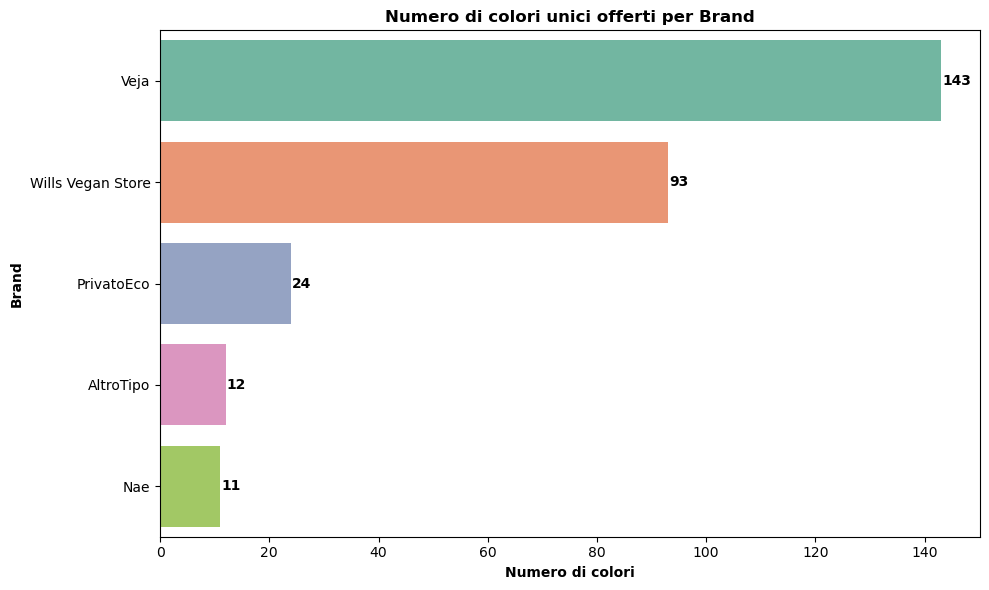

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola il numero di colori unici per brand
colori_per_brand = df_union.groupby("Brand")["Colore"].nunique().sort_values(ascending=False)

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=colori_per_brand.values, y=colori_per_brand.index, palette="Set2")

# Etichette sopra le barre
for i, valore in enumerate(colori_per_brand.values):
    plt.text(valore + 0.2, i, str(valore), va='center', fontweight='bold')

# Stile grafico
plt.title("Numero di colori unici offerti per Brand", fontweight='bold')
plt.xlabel("Numero di colori", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.tight_layout()
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\57416401.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=colori_per_brand.values, y=colori_per_brand.index,


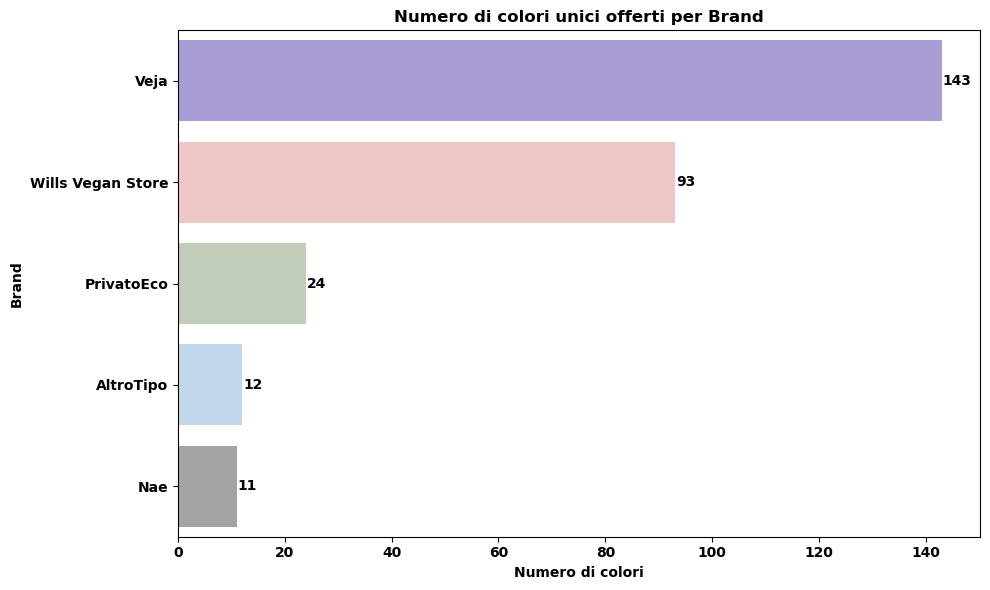

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcola il numero di colori unici per brand
colori_per_brand = df_union.groupby("Brand")["Colore"].nunique().sort_values(ascending=False)

# Nuova palette elegante (tonalità lilla, beige, oliva, blu, grigio)
colori_personalizzati = ["#A593E0", "#F4BFBF", "#C1D0B5", "#B9D6F2", "#A3A3A3"]

# Grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=colori_per_brand.values, y=colori_per_brand.index,
            palette=colori_personalizzati[:len(colori_per_brand)])

# Etichette sopra le barre
for i, valore in enumerate(colori_per_brand.values):
    plt.text(valore + 0.2, i, str(valore), va='center', fontweight='bold')

# Stile
plt.title("Numero di colori unici offerti per Brand", fontweight='bold')
plt.xlabel("Numero di colori", fontweight='bold')
plt.ylabel("Brand", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.savefig("colori_unici", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\2838696154.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=uomo_per_categoria.index, y=uomo_per_categoria.values, palette=palette_uomo[:len(uomo_per_categoria)])
C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\2838696154.py:17: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=uomo_per_categoria.index, y=uomo_per_categoria.values, palette=palette_uomo[:len(uomo_per_categoria)])


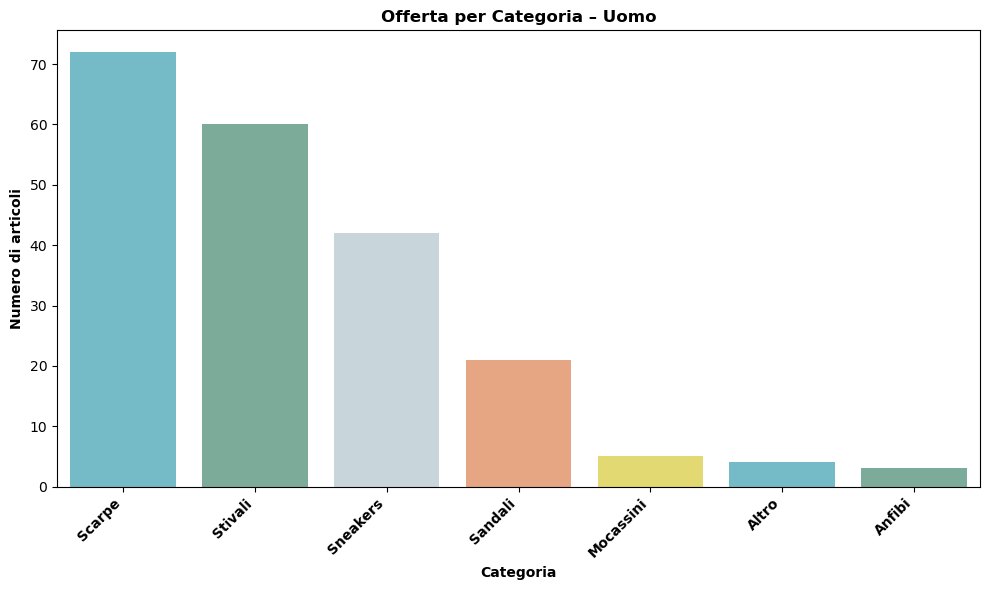

C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\2838696154.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=donna_per_categoria.index, y=donna_per_categoria.values, palette=palette_donna[:len(donna_per_categoria)])
C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\2838696154.py:34: UserWarning: 
The palette list has fewer values (5) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=donna_per_categoria.index, y=donna_per_categoria.values, palette=palette_donna[:len(donna_per_categoria)])


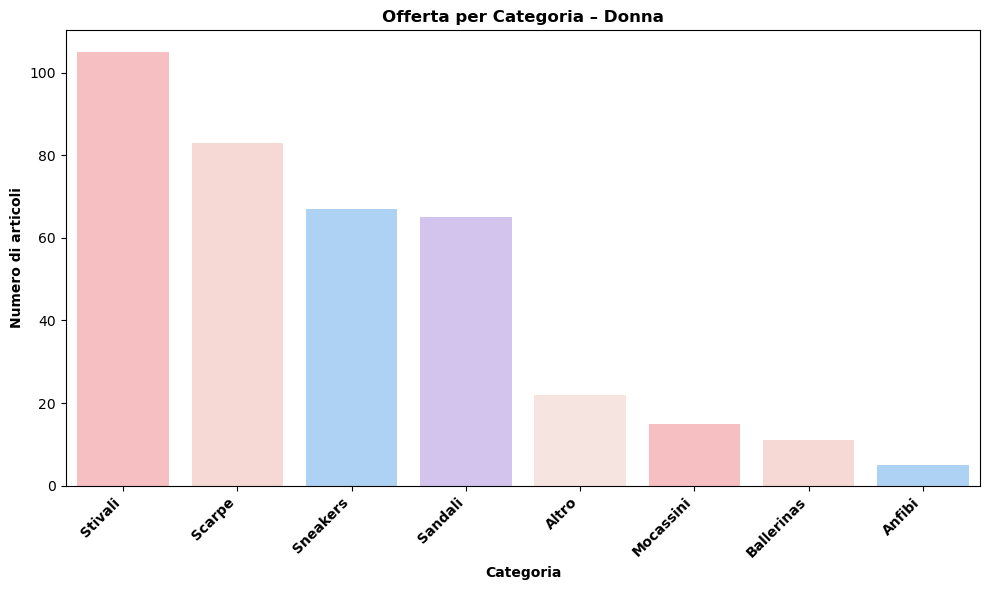

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Palette diverse per ogni grafico
palette_uomo = ["#68c3d4", "#74b49b", "#c4d7e0", "#f7a072", "#f5e960"]
palette_donna = ["#ffb6b9", "#fcd5ce", "#a2d2ff", "#d0bdf4", "#fae1dd"]

# FILTRO UOMO
df_uomo = df_union[df_union["Genere"] == "Uomo"]

# Conta per categoria
uomo_per_categoria = df_uomo["Categoria"].value_counts()

# GRAFICO UOMO
plt.figure(figsize=(10, 6))
sns.barplot(x=uomo_per_categoria.index, y=uomo_per_categoria.values, palette=palette_uomo[:len(uomo_per_categoria)])

plt.title("Offerta per Categoria – Uomo", fontweight='bold')
plt.xlabel("Categoria", fontweight='bold')
plt.ylabel("Numero di articoli", fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.tight_layout()
plt.show()

# FILTRO DONNA
df_donna = df_union[df_union["Genere"] == "Donna"]

# Conta per categoria
donna_per_categoria = df_donna["Categoria"].value_counts()

# GRAFICO DONNA
plt.figure(figsize=(10, 6))
sns.barplot(x=donna_per_categoria.index, y=donna_per_categoria.values, palette=palette_donna[:len(donna_per_categoria)])

plt.title("Offerta per Categoria – Donna", fontweight='bold')
plt.xlabel("Categoria", fontweight='bold')
plt.ylabel("Numero di articoli", fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.tight_layout()
plt.show()


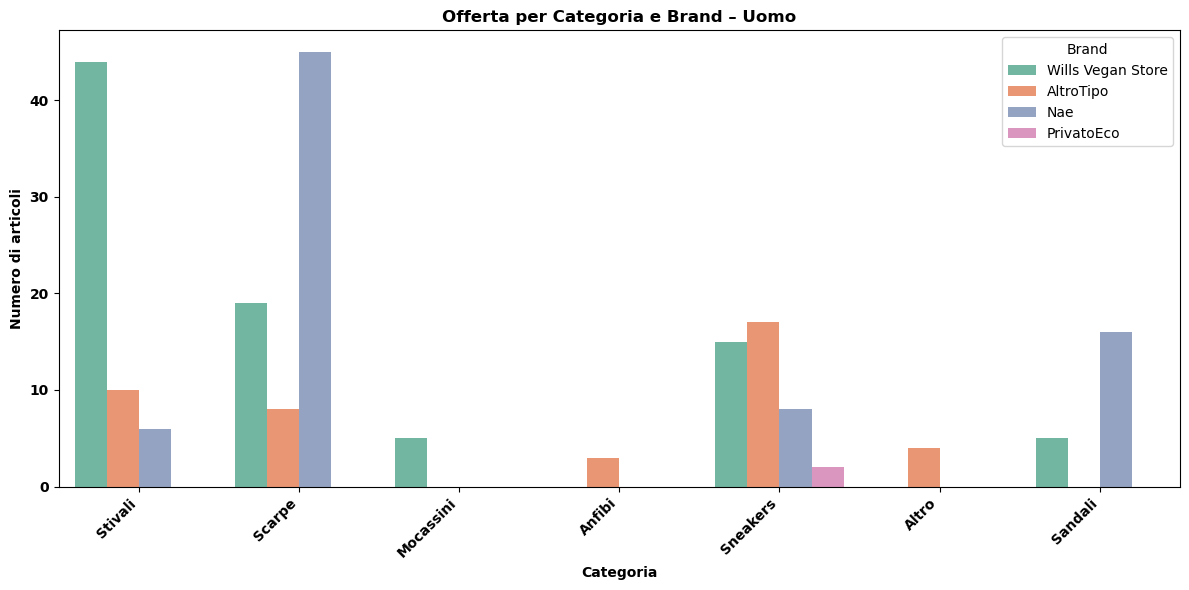

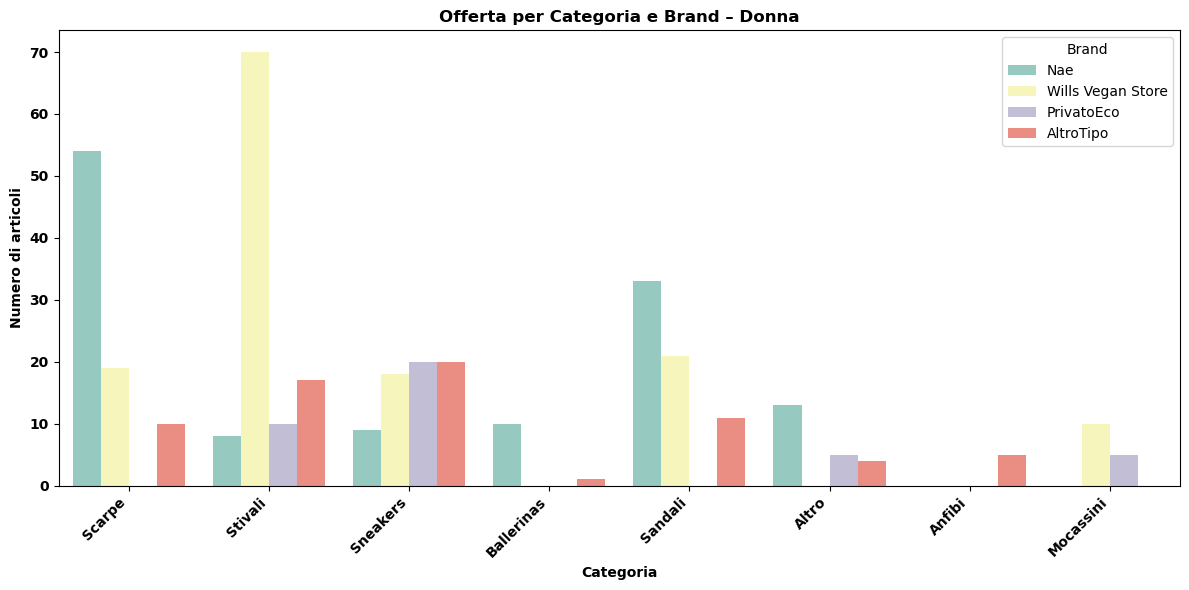

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra dati solo Uomo e Donna
df_filtrato = df_union[df_union["Genere"].isin(["Uomo", "Donna"])]

# Grafico per UOMO
df_uomo = df_filtrato[df_filtrato["Genere"] == "Uomo"]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_uomo, x="Categoria", hue="Brand", palette="Set2")

plt.title("Offerta per Categoria e Brand – Uomo", fontweight='bold')
plt.xlabel("Categoria", fontweight='bold')
plt.ylabel("Numero di articoli", fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(title="Brand")
plt.tight_layout()
plt.show()

# Grafico per DONNA
df_donna = df_filtrato[df_filtrato["Genere"] == "Donna"]
plt.figure(figsize=(12, 6))
sns.countplot(data=df_donna, x="Categoria", hue="Brand", palette="Set3")

plt.title("Offerta per Categoria e Brand – Donna", fontweight='bold')
plt.xlabel("Categoria", fontweight='bold')
plt.ylabel("Numero di articoli", fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(title="Brand")
plt.tight_layout()
plt.show()


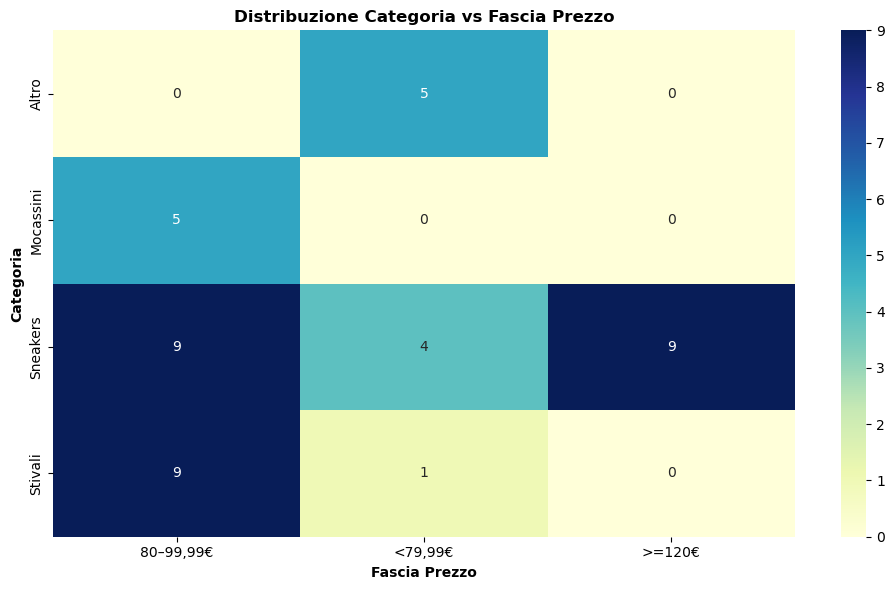

In [214]:
tabella = pd.crosstab(df_union["Categoria"], df_union["Fascia_Prezzo"])
plt.figure(figsize=(10, 6))
sns.heatmap(tabella, annot=True, fmt="d", cmap="YlGnBu")

plt.title("Distribuzione Categoria vs Fascia Prezzo", fontweight='bold')
plt.xlabel("Fascia Prezzo", fontweight='bold')
plt.ylabel("Categoria", fontweight='bold')
plt.tight_layout()
plt.savefig("categoriavsprezzo.png", dpi=300, bbox_inches='tight')
plt.show()


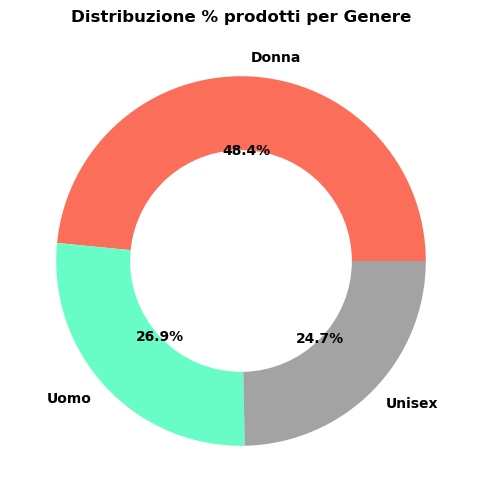

In [216]:
genere_counts = df_union["Genere"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(genere_counts, labels=genere_counts.index, autopct='%1.1f%%',
        wedgeprops=dict(width=0.4), colors=["#fb6e5a", "#68fdc6", "#a3a3a3"], textprops={'fontweight': 'bold'})
plt.title("Distribuzione % prodotti per Genere", fontweight='bold')
plt.show()


C:\Users\dilor\AppData\Local\Temp\ipykernel_13336\3066002293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_union, x="Categoria", y="Prezzo", palette="pastel")


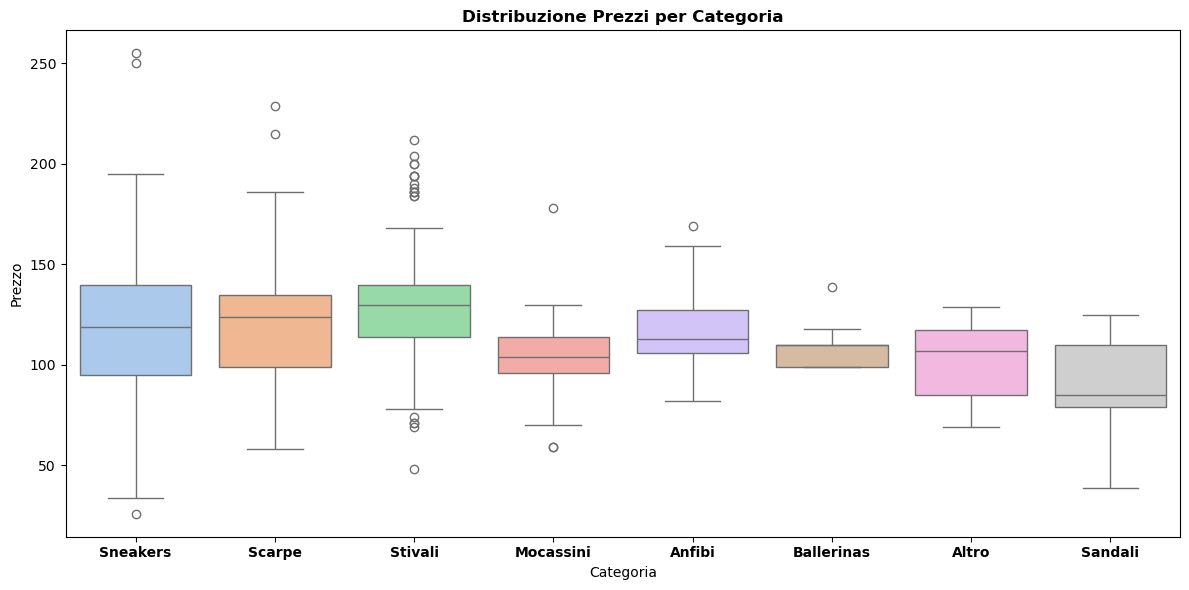

In [228]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_union, x="Categoria", y="Prezzo", palette="pastel")
plt.title("Distribuzione Prezzi per Categoria", fontweight='bold')
plt.xticks(rotation=0, ha='center',fontweight='bold')
plt.xticks(rotation=0, ha='center',)
plt.tight_layout()
plt.savefig("distribuzioneprezzipercategoria.png", dpi=300, bbox_inches='tight')
plt.show()


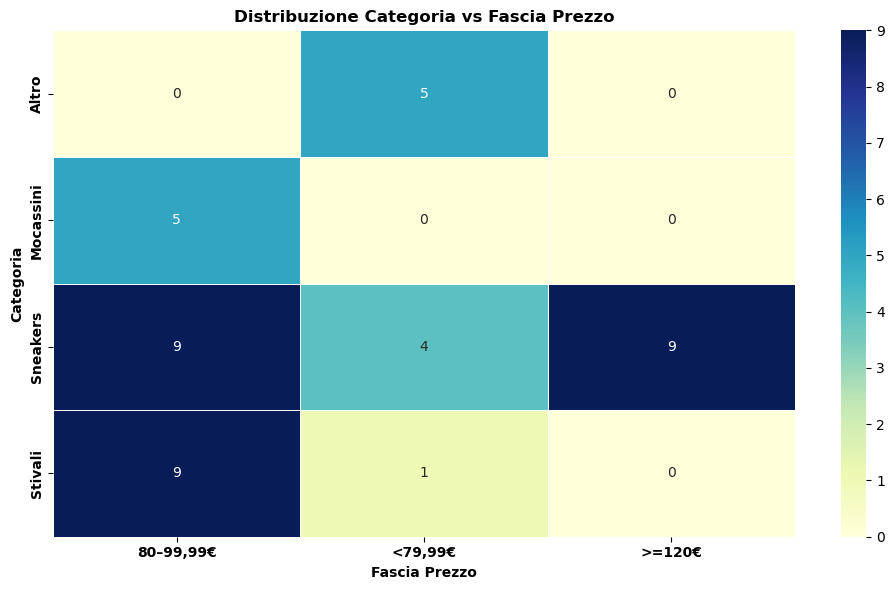

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Raggruppamento per Categoria e Fascia Prezzo
heatmap_data = pd.crosstab(df_union["Categoria"], df_union["Fascia_Prezzo"])

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5, linecolor='white')

plt.title("Distribuzione Categoria vs Fascia Prezzo", fontweight='bold')
plt.xlabel("Fascia Prezzo", fontweight='bold')
plt.ylabel("Categoria", fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()
plt.show()


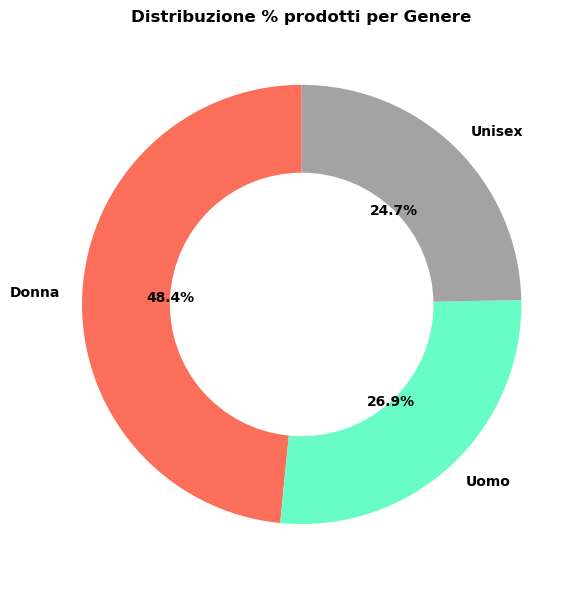

In [232]:
import matplotlib.pyplot as plt

# Conta i prodotti per Genere
genere_counts = df_union["Genere"].value_counts()

# Colori personalizzati
colori = ["#fb6e5a", "#68fdc6", "#A3A3A3"]  # Donna, Uomo, Unisex

# Doughnut chart
plt.figure(figsize=(6, 6))
plt.pie(genere_counts, labels=genere_counts.index, autopct='%1.1f%%',
        startangle=90, wedgeprops=dict(width=0.4), colors=colori, textprops={'fontweight': 'bold'})

plt.title("Distribuzione % prodotti per Genere", fontweight='bold')
plt.tight_layout()
plt.show()


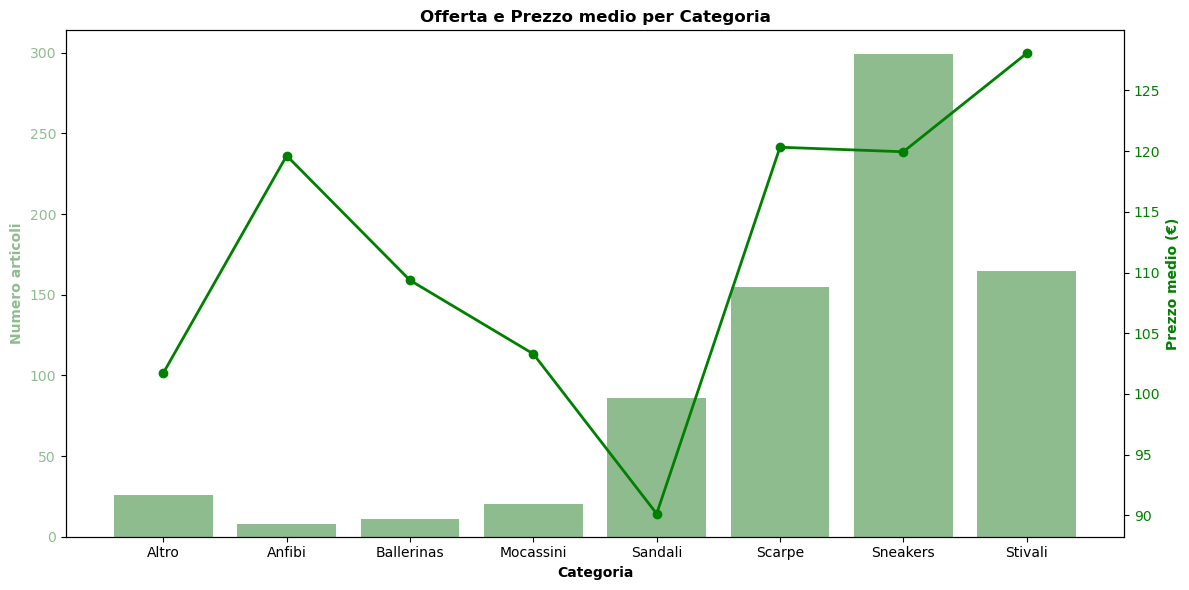

In [242]:
import matplotlib.pyplot as plt

# Calcolo numero di articoli e prezzo medio per categoria
conteggio = df_union["Categoria"].value_counts().sort_index()
media_prezzo = df_union.groupby("Categoria")["Prezzo"].mean().reindex(conteggio.index)

# Grafico combinato
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barre: numero articoli
color_barre = "#8fbc8f"
ax1.bar(conteggio.index, conteggio.values, color=color_barre, label="Numero articoli")
ax1.set_ylabel("Numero articoli", fontweight='bold', color=color_barre)
ax1.tick_params(axis='y', labelcolor=color_barre)

# Linea: prezzo medio
ax2 = ax1.twinx()
color_linea = "#008000"
ax2.plot(media_prezzo.index, media_prezzo.values, color=color_linea, marker='o', linewidth=2, label="Prezzo medio (€)")
ax2.set_ylabel("Prezzo medio (€)", fontweight='bold', color=color_linea)
ax2.tick_params(axis='y', labelcolor=color_linea)

# Titolo e asse x
plt.title("Offerta e Prezzo medio per Categoria", fontweight='bold')
ax1.set_xlabel("Categoria", fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.tight_layout()
plt.savefig("offerta_pm_percategoria.png", dpi=300, bbox_inches='tight')
plt.show()


SyntaxError: invalid syntax (2649101553.py, line 8)